In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math
import scipy.io as io
from settings_config import *
from dimensionality_reduction import *
from preprocessing import *
import random
from sklearn import svm, naive_bayes,discriminant_analysis,model_selection
from sklearn.metrics import mean_squared_error,accuracy_score
from matplotlib.lines import Line2D

## Get data

In [2]:
# Get data from csv
likelihood_EMT46_2, positions_EMT46_2, angles_EMT46_2 = get_likelihood_positions_angles_nans(EMT46_2_path,length_EMT46_2,\
                                                                              likelihood_threshold=0.75,labels_format='46/16')
likelihood_EMT16, positions_EMT16, angles_EMT16 = get_likelihood_positions_angles_nans(EMT16_path,length_EMT16,\
                                                                              likelihood_threshold=0.8,labels_format='46/16')

likelihood_EMT45, positions_EMT45, angles_EMT45 = get_likelihood_positions_angles_nans(EMT45_path,length_EMT45,\
                                                                                 likelihood_threshold=0.9,labels_format='45')
likelihood_subject45, positions_subject45, angles_subject45 = get_likelihood_positions_angles_nans(subject45_path,\
                                                                 length_subject45,likelihood_threshold=0.9,labels_format='45')

likelihood_EMT19, positions_EMT19, angles_EMT19 = get_likelihood_positions_angles_nans(EMT19_path,length_EMT19,\
                                                                                              likelihood_threshold=0.75)
likelihood_EMT28, positions_EMT28, angles_EMT28 = get_likelihood_positions_angles_nans(EMT28_path,length_EMT28,\
                                                                                              likelihood_threshold=0.75)

likelihood_EMT48, positions_EMT48, angles_EMT48 = get_likelihood_positions_angles_nans(EMT48_path,length_EMT48,\
                                                                                              likelihood_threshold=0.75)
likelihood_EMT17, positions_EMT17, angles_EMT17 = get_likelihood_positions_angles_nans(EMT17_path,length_EMT17,\
                                                                                              likelihood_threshold=0.75)
likelihood_EMT47, positions_EMT47, angles_EMT47 = get_likelihood_positions_angles_nans(EMT47_path,length_EMT47,\
                                                                                              likelihood_threshold=0.75)
likelihood_EMT18, positions_EMT18, angles_EMT18 = get_likelihood_positions_angles_nans(EMT18_path,length_EMT18,\
                                                                                              likelihood_threshold=0.75)

In [3]:
# Centering and normalizing angles
angles_EMT16_center = center(angles_EMT16)
angles_EMT46_2_center = center(angles_EMT46_2)
angles_EMT45_center = center(angles_EMT45)
angles_subject45_center = center(angles_subject45)
angles_EMT19_center = center(angles_EMT19)
angles_EMT28_center = center(angles_EMT28)
angles_EMT17_center = center(angles_EMT17)
angles_EMT48_center = center(angles_EMT48)
angles_EMT18_center = center(angles_EMT18)
angles_EMT47_center = center(angles_EMT47)

angles_EMT16_normalized__ = normalize_angles_range(angles_EMT16)
angles_EMT46_2_normalized__ = normalize_angles_range(angles_EMT46_2)
angles_EMT45_normalized__ = normalize_angles_range(angles_EMT45)
angles_subject45_normalized__ = normalize_angles_range(angles_subject45)
angles_EMT19_normalized__ = normalize_angles_range(angles_EMT19)
angles_EMT28_normalized__ = normalize_angles_range(angles_EMT28)
angles_EMT17_normalized__ = normalize_angles_range(angles_EMT17)
angles_EMT48_normalized__ = normalize_angles_range(angles_EMT48)
angles_EMT18_normalized__ = normalize_angles_range(angles_EMT18)
angles_EMT47_normalized__ = normalize_angles_range(angles_EMT47)

angles_EMT16_normalized = center(angles_EMT16_normalized__)
angles_EMT46_2_normalized = center(angles_EMT46_2_normalized__)
angles_EMT45_normalized = center(angles_EMT45_normalized__)
angles_subject45_normalized = center(angles_subject45_normalized__)
angles_EMT19_normalized = center(angles_EMT19_normalized__)
angles_EMT28_normalized = center(angles_EMT28_normalized__)
angles_EMT17_normalized = center(angles_EMT17_normalized__)
angles_EMT48_normalized = center(angles_EMT48_normalized__)
angles_EMT18_normalized = center(angles_EMT18_normalized__)
angles_EMT47_normalized = center(angles_EMT47_normalized__)

# Getting angular velocity

angular_velocity_EMT16 = center(abs(np.diff(angles_EMT16)))
angular_velocity_EMT46_2 = center(abs(np.diff(angles_EMT46_2)))
angular_velocity_EMT45 = center(abs(np.diff(angles_EMT45)))
angular_velocity_subject45 = center(abs(np.diff(angles_subject45)))
angular_velocity_EMT19 = center(abs(np.diff(angles_EMT19)))
angular_velocity_EMT28 = center(abs(np.diff(angles_EMT28)))
angular_velocity_EMT17 = center(abs(np.diff(angles_EMT17)))
angular_velocity_EMT18 = center(abs(np.diff(angles_EMT18)))
angular_velocity_EMT47 = center(abs(np.diff(angles_EMT47)))
angular_velocity_EMT48 = center(abs(np.diff(angles_EMT48)))

angular_velocity_EMT16_normalized = center(abs(np.diff(angles_EMT16_normalized__)))
angular_velocity_EMT46_2_normalized = center(abs(np.diff(angles_EMT46_2_normalized__)))
angular_velocity_EMT45_normalized = center(abs(np.diff(angles_EMT45_normalized__)))
angular_velocity_subject45_normalized = center(abs(np.diff(angles_subject45_normalized__)))
angular_velocity_EMT19_normalized = center(abs(np.diff(angles_EMT19_normalized__)))
angular_velocity_EMT28_normalized = center(abs(np.diff(angles_EMT28_normalized__)))
angular_velocity_EMT17_normalized = center(abs(np.diff(angles_EMT17_normalized__)))
angular_velocity_EMT18_normalized = center(abs(np.diff(angles_EMT18_normalized__)))
angular_velocity_EMT47_normalized = center(abs(np.diff(angles_EMT47_normalized__)))
angular_velocity_EMT48_normalized = center(abs(np.diff(angles_EMT48_normalized__)))

# Delete nans
angles_EMT16_ = delete_nans(angles_EMT16_center)
angles_EMT46_2_ = delete_nans(angles_EMT46_2_center)
angles_EMT45_ = delete_nans(angles_EMT45_center)
angles_subject45_ = delete_nans(angles_subject45_center)
angles_EMT19_ = delete_nans(angles_EMT19_center)
angles_EMT28_ = delete_nans(angles_EMT28_center)
angles_EMT17_ = delete_nans(angles_EMT17_center)
angles_EMT48_ = delete_nans(angles_EMT48_center)
angles_EMT18_ = delete_nans(angles_EMT18_center)
angles_EMT47_ = delete_nans(angles_EMT47_center)

angles_EMT16_normalized_ = delete_nans(angles_EMT16_normalized)
angles_EMT46_2_normalized_ = delete_nans(angles_EMT46_2_normalized)
angles_EMT45_normalized_ = delete_nans(angles_EMT45_normalized)
angles_subject45_normalized_ = delete_nans(angles_subject45_normalized)
angles_EMT19_normalized_ = delete_nans(angles_EMT19_normalized)
angles_EMT28_normalized_ = delete_nans(angles_EMT28_normalized)
angles_EMT17_normalized_ = delete_nans(angles_EMT17_normalized)
angles_EMT48_normalized_ = delete_nans(angles_EMT48_normalized)
angles_EMT18_normalized_ = delete_nans(angles_EMT18_normalized)
angles_EMT47_normalized_ = delete_nans(angles_EMT47_normalized)

angular_velocity_EMT16_ = delete_nans(angular_velocity_EMT16)
angular_velocity_EMT46_2_ = delete_nans(angular_velocity_EMT46_2)
angular_velocity_EMT45_ = delete_nans(angular_velocity_EMT45)
angular_velocity_subject45_ = delete_nans(angular_velocity_subject45)
angular_velocity_EMT19_ = delete_nans(angular_velocity_EMT19)
angular_velocity_EMT28_ = delete_nans(angular_velocity_EMT28)
angular_velocity_EMT17_ = delete_nans(angular_velocity_EMT17)
angular_velocity_EMT18_ = delete_nans(angular_velocity_EMT18)
angular_velocity_EMT47_ = delete_nans(angular_velocity_EMT47)
angular_velocity_EMT48_ = delete_nans(angular_velocity_EMT48)

angular_velocity_EMT16_normalized_ = delete_nans(angular_velocity_EMT16_normalized)
angular_velocity_EMT46_2_normalized_ = delete_nans(angular_velocity_EMT46_2_normalized)
angular_velocity_EMT45_normalized_ = delete_nans(angular_velocity_EMT45_normalized)
angular_velocity_subject45_normalized_ = delete_nans(angular_velocity_subject45_normalized)
angular_velocity_EMT19_normalized_ = delete_nans(angular_velocity_EMT19_normalized)
angular_velocity_EMT28_normalized_ = delete_nans(angular_velocity_EMT28_normalized)
angular_velocity_EMT17_normalized_ = delete_nans(angular_velocity_EMT17_normalized)
angular_velocity_EMT18_normalized_ = delete_nans(angular_velocity_EMT18_normalized)
angular_velocity_EMT47_normalized_ = delete_nans(angular_velocity_EMT47_normalized)
angular_velocity_EMT48_normalized_ = delete_nans(angular_velocity_EMT48_normalized)

max_trunk: 2.079783706445542
min_trunk: 0.9923816965035062
max_head: 2.23897432946313
min_head: 0.3685154091621472
max_trunk: 2.0214708449697034
min_trunk: 1.1453969039960248
max_head: 1.7042925136926457
min_head: 0.539512627292701
max_trunk: 2.6312465230445983
min_trunk: 0.6474441738406557
max_head: 2.1826590481741985
min_head: 0.31221494235705793
max_trunk: 2.275655086476307
min_trunk: 0.7369698161295
max_head: 1.900902598509181
min_head: 0.3402896306029039
max_trunk: 2.0373711938935326
min_trunk: 1.0855316914204534
max_head: 2.1834501346486306
min_head: 0.227843898014761
max_trunk: 2.5334200975249717
min_trunk: 0.9170555901839543
max_head: 2.0837342068907163
min_head: 0.3547850491238438
max_trunk: 2.337428970221393
min_trunk: 0.8328018885338291
max_head: 1.9214796987300597
min_head: 0.3434570039161501
max_trunk: 2.4932417371170157
min_trunk: 0.747927733120133
max_head: 1.4815567883169707
min_head: 0.4246912400443352
max_trunk: 2.2164617667366215
min_trunk: 1.0196342565384882
max_hea

In [4]:
labels = ['Early mild 1','Late mild 1','Early mild 2','Late mild 2','Early mild 3','Late mild 3','Early mild 4','Late mild 4',' Typical 1',' Typical 2'] 
angles = [angles_EMT19_,angles_EMT28_,angles_EMT16_,angles_EMT46_2_,angles_EMT17_,angles_EMT48_,angles_EMT18_,angles_EMT47_]
angles_norm = [angles_EMT19_normalized_,angles_EMT28_normalized_,angles_EMT16_normalized_,angles_EMT46_2_normalized_,angles_EMT17_normalized_,angles_EMT48_normalized_,angles_EMT18_normalized_,angles_EMT47_normalized_]
angular_velocity = [angular_velocity_EMT19_,angular_velocity_EMT28_,angular_velocity_EMT16_,angular_velocity_EMT46_2_,angular_velocity_EMT17_,angular_velocity_EMT48_,angular_velocity_EMT18_,angular_velocity_EMT47_]
angular_velocity_norm = [angular_velocity_EMT19_normalized_,angular_velocity_EMT28_normalized_,angular_velocity_EMT16_normalized_,angular_velocity_EMT46_2_normalized_,angular_velocity_EMT17_normalized_,angular_velocity_EMT48_normalized_,angular_velocity_EMT18_normalized_,angular_velocity_EMT47_normalized_]


In [5]:
small_dim = 3
interm_dim = 6
big_dim = 9

# PCA crossvalidation

## Crossprojection between segments of the same video

### Angles

Wilcoxon rank sum test p-value: 0.0.
Wilcoxon rank sum test p-value: 0.0.
Wilcoxon rank sum test p-value: 0.0.
Wilcoxon rank sum test p-value: 0.0.
Wilcoxon rank sum test p-value: 0.0.
Wilcoxon rank sum test p-value: 0.0.
Wilcoxon rank sum test p-value: 0.0.
Wilcoxon rank sum test p-value: 0.0.
Wilcoxon rank sum test p-value: 0.0.
Wilcoxon rank sum test p-value: 0.0.


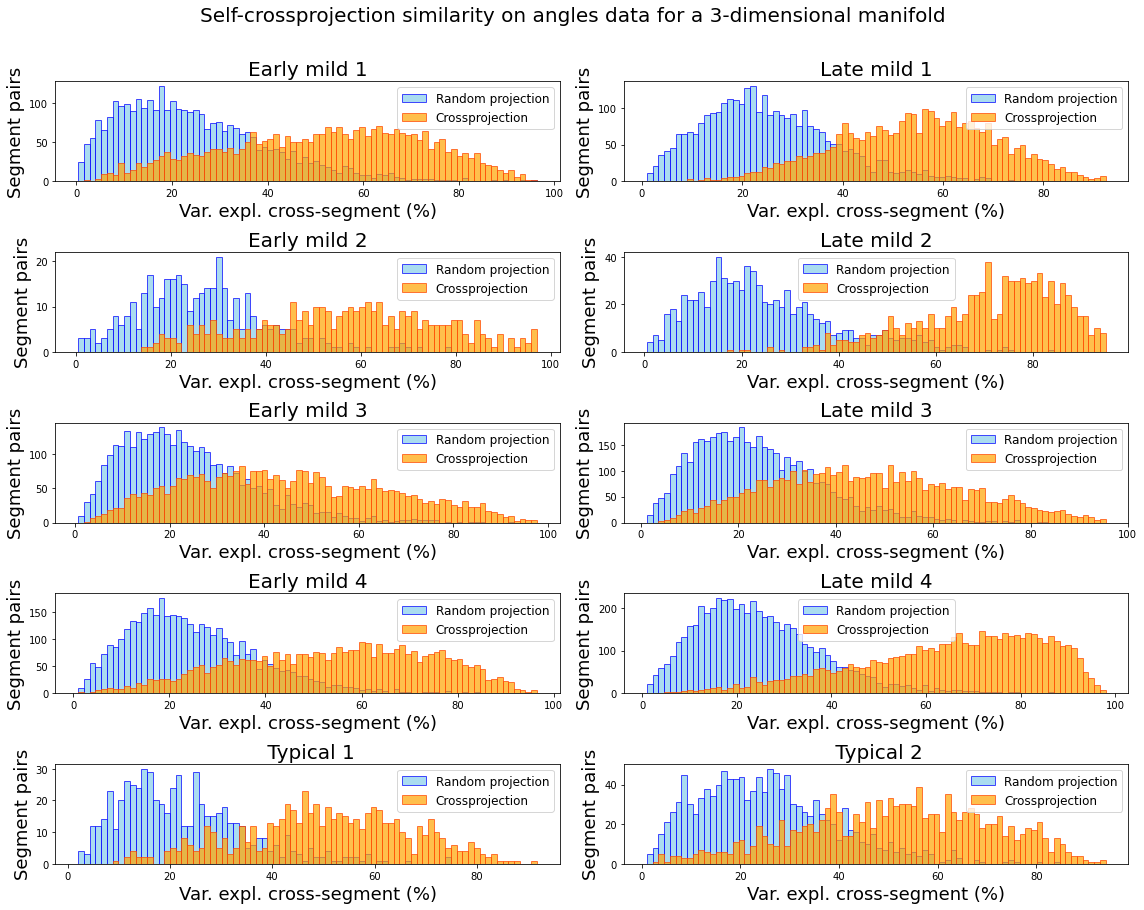

Wilcoxon rank sum test p-value: 0.0.
Wilcoxon rank sum test p-value: 0.0.
Wilcoxon rank sum test p-value: 0.0.
Wilcoxon rank sum test p-value: 0.0.
Wilcoxon rank sum test p-value: 0.0.
Wilcoxon rank sum test p-value: 0.0.
Wilcoxon rank sum test p-value: 0.0.
Wilcoxon rank sum test p-value: 0.0.
Wilcoxon rank sum test p-value: 0.0.
Wilcoxon rank sum test p-value: 0.0.


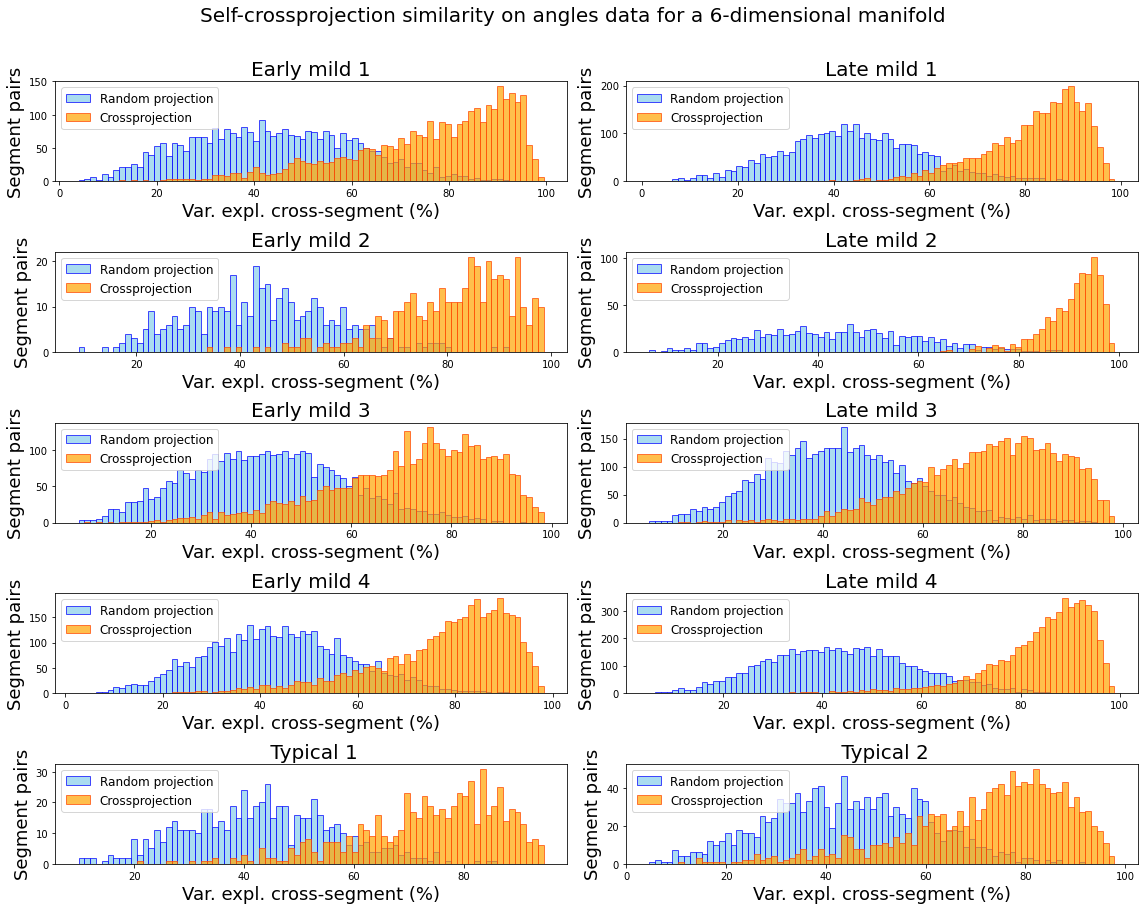

Wilcoxon rank sum test p-value: 0.0.
Wilcoxon rank sum test p-value: 0.0.
Wilcoxon rank sum test p-value: 0.0.
Wilcoxon rank sum test p-value: 0.0.
Wilcoxon rank sum test p-value: 0.0.
Wilcoxon rank sum test p-value: 0.0.
Wilcoxon rank sum test p-value: 0.0.
Wilcoxon rank sum test p-value: 0.0.
Wilcoxon rank sum test p-value: 0.0.
Wilcoxon rank sum test p-value: 0.0.


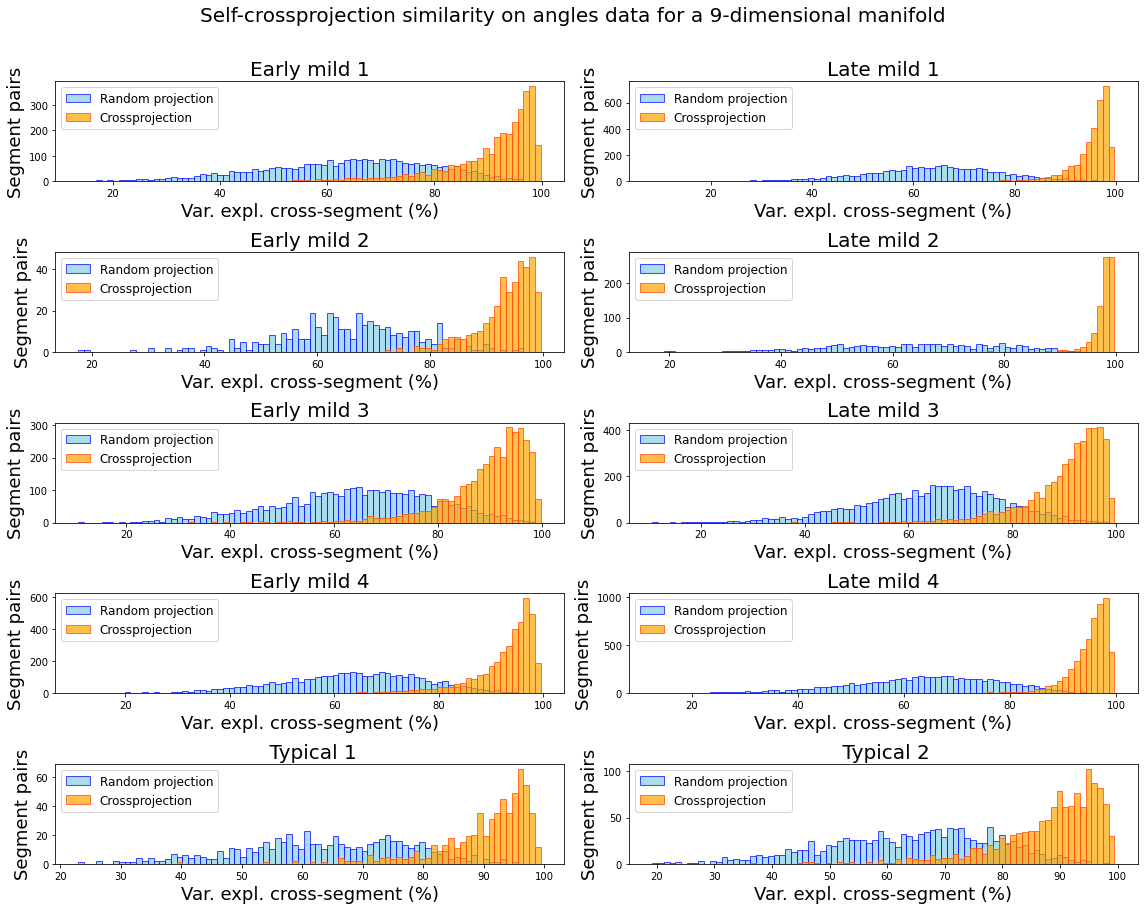

In [32]:
self_crossprojection_videos_plot(angles,labels,small_dim,'angles')
self_crossprojection_videos_plot(angles,labels,interm_dim,'angles')
self_crossprojection_videos_plot(angles,labels,big_dim,'angles')

### Normalized angles

Wilcoxon rank sum test p-value: 0.0.
Wilcoxon rank sum test p-value: 0.0.
Wilcoxon rank sum test p-value: 0.0.
Wilcoxon rank sum test p-value: 0.0.
Wilcoxon rank sum test p-value: 0.0.
Wilcoxon rank sum test p-value: 0.0.
Wilcoxon rank sum test p-value: 0.0.
Wilcoxon rank sum test p-value: 0.0.
Wilcoxon rank sum test p-value: 0.0.
Wilcoxon rank sum test p-value: 0.0.


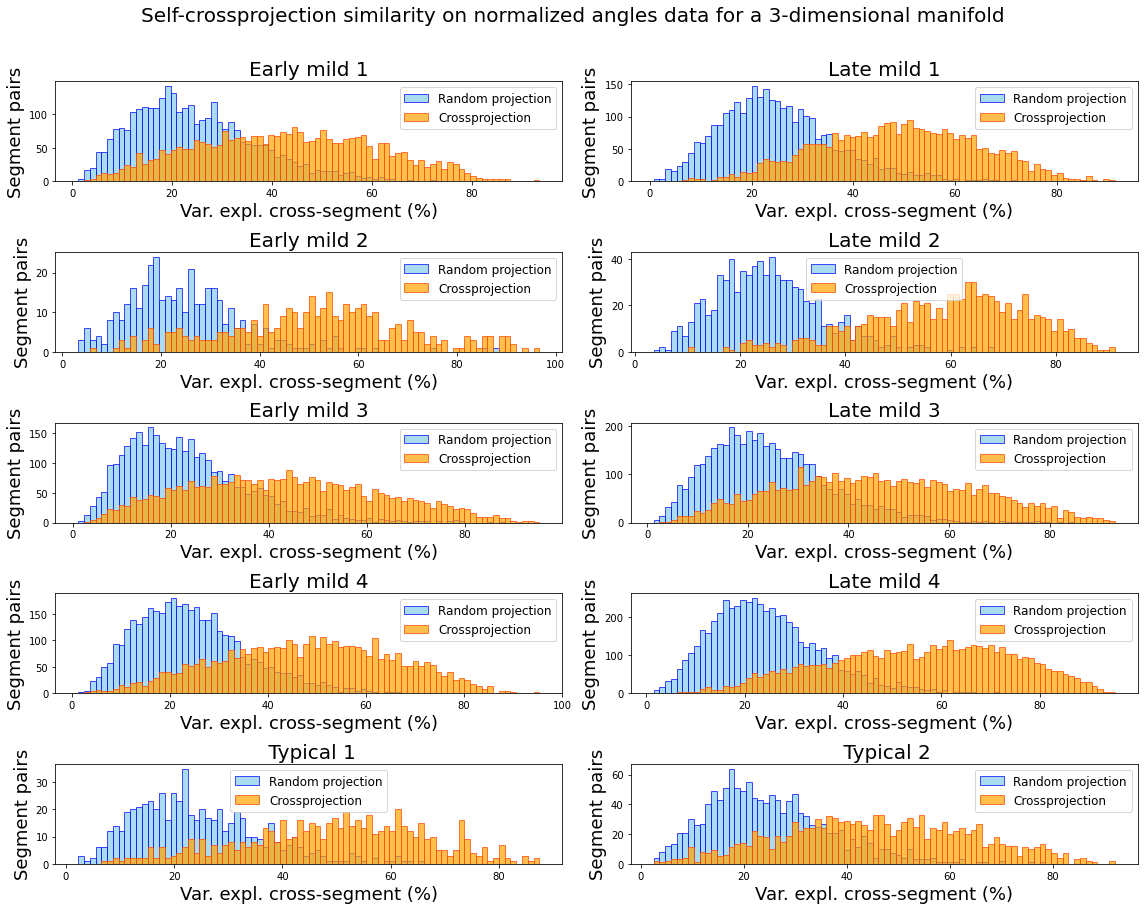

Wilcoxon rank sum test p-value: 0.0.
Wilcoxon rank sum test p-value: 0.0.
Wilcoxon rank sum test p-value: 0.0.
Wilcoxon rank sum test p-value: 0.0.
Wilcoxon rank sum test p-value: 0.0.
Wilcoxon rank sum test p-value: 0.0.
Wilcoxon rank sum test p-value: 0.0.
Wilcoxon rank sum test p-value: 0.0.
Wilcoxon rank sum test p-value: 0.0.
Wilcoxon rank sum test p-value: 0.0.


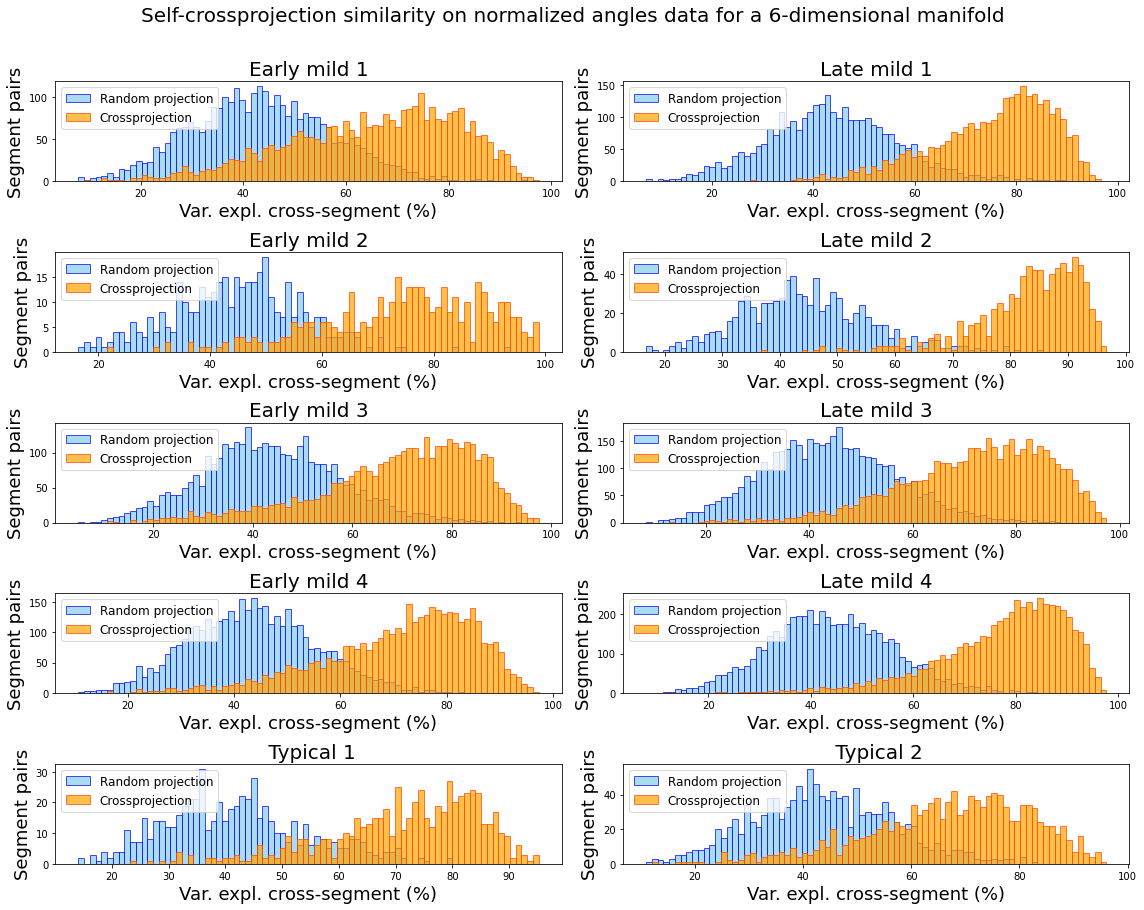

Wilcoxon rank sum test p-value: 0.0.
Wilcoxon rank sum test p-value: 0.0.
Wilcoxon rank sum test p-value: 0.0.
Wilcoxon rank sum test p-value: 0.0.
Wilcoxon rank sum test p-value: 0.0.
Wilcoxon rank sum test p-value: 0.0.
Wilcoxon rank sum test p-value: 0.0.
Wilcoxon rank sum test p-value: 0.0.
Wilcoxon rank sum test p-value: 0.0.
Wilcoxon rank sum test p-value: 0.0.


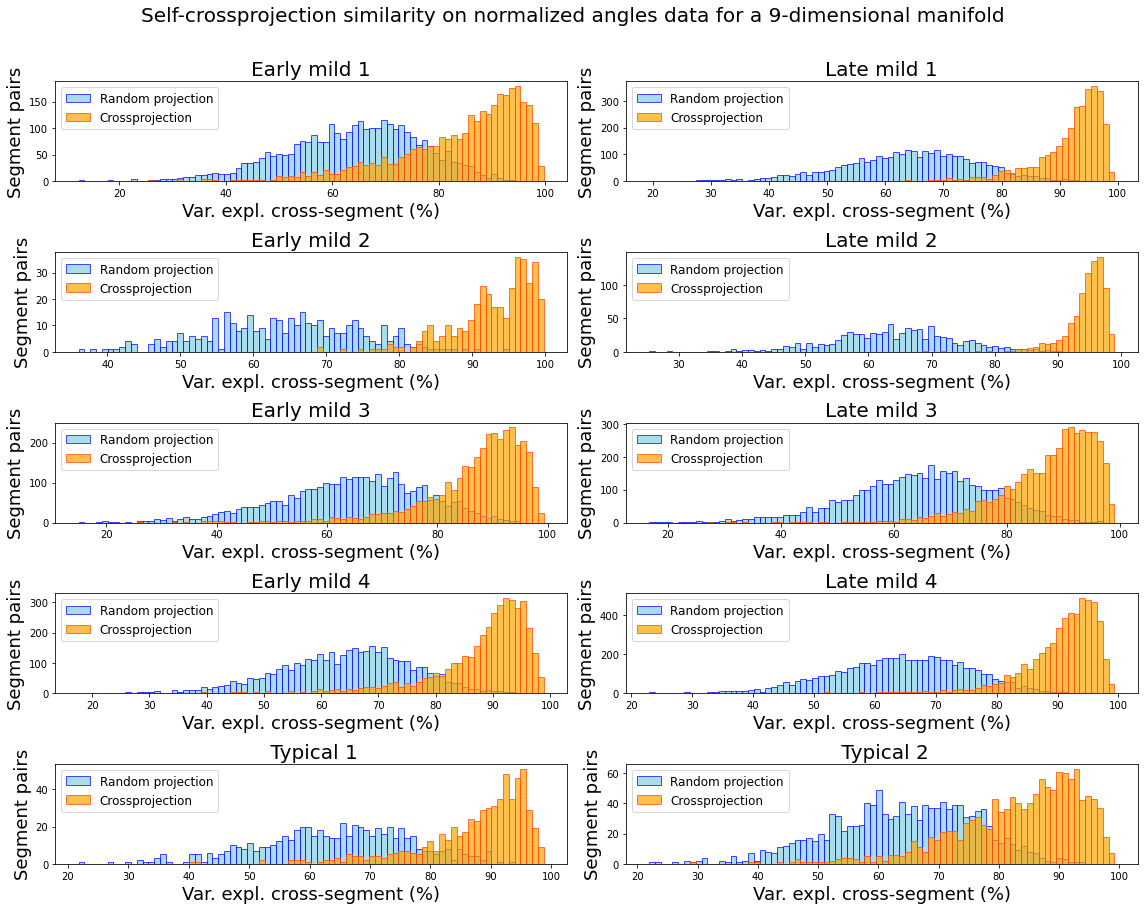

In [33]:
angles_norm_labels = ['Norm. Angl. Interm. Young','Norm. Angl. Interm. V1','Norm. Angl. Interm. V2','Norm. Angl. Normal V1','Norm. Angl. Normal V2'] 
self_crossprojection_videos_plot(angles_norm,labels,small_dim,'normalized angles')
self_crossprojection_videos_plot(angles_norm,labels,interm_dim,'normalized angles')
self_crossprojection_videos_plot(angles_norm,labels,big_dim,'normalized angles')

### Angular velocity

Wilcoxon rank sum test p-value: 0.0.
Wilcoxon rank sum test p-value: 0.0.
Wilcoxon rank sum test p-value: 0.0.
Wilcoxon rank sum test p-value: 0.0.
Wilcoxon rank sum test p-value: 0.0.
Wilcoxon rank sum test p-value: 0.0.
Wilcoxon rank sum test p-value: 0.0.
Wilcoxon rank sum test p-value: 0.0.
Wilcoxon rank sum test p-value: 0.0.
Wilcoxon rank sum test p-value: 0.0.


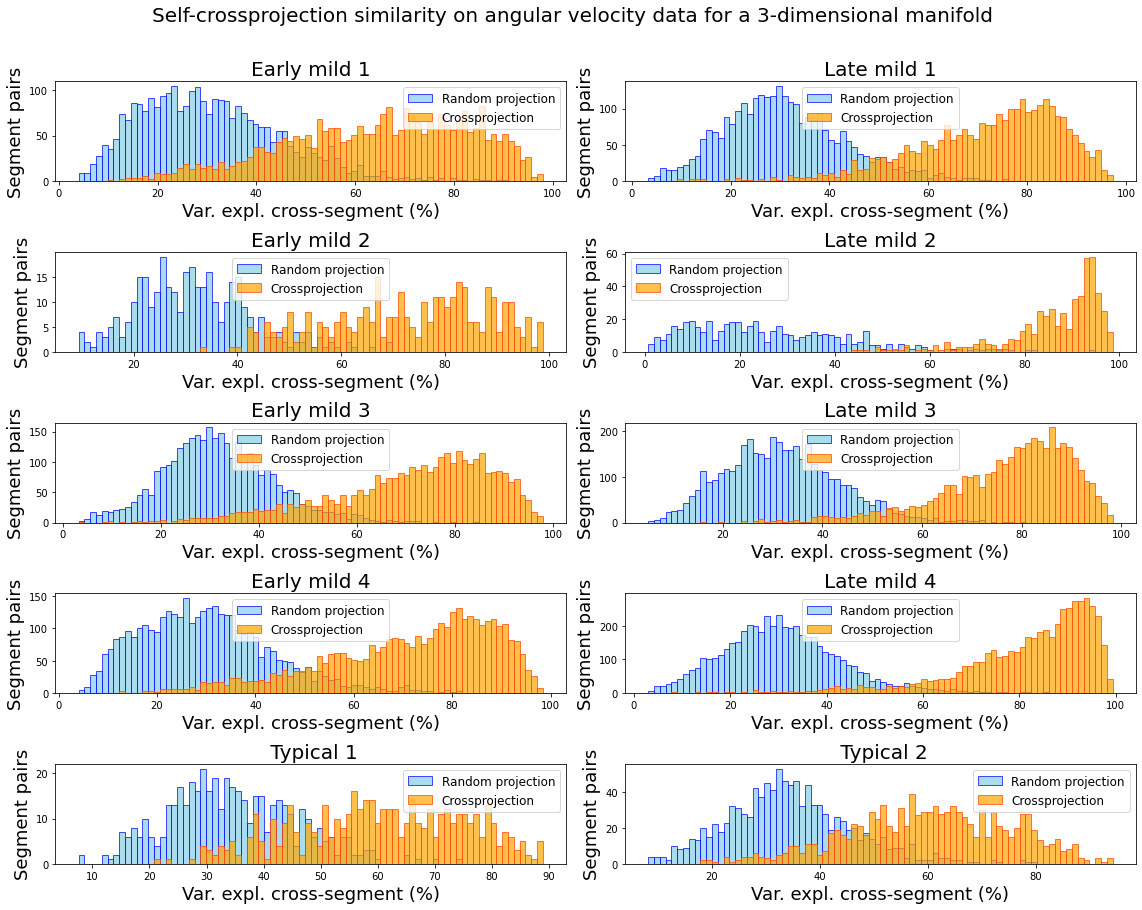

Wilcoxon rank sum test p-value: 0.0.
Wilcoxon rank sum test p-value: 0.0.
Wilcoxon rank sum test p-value: 0.0.
Wilcoxon rank sum test p-value: 0.0.
Wilcoxon rank sum test p-value: 0.0.
Wilcoxon rank sum test p-value: 0.0.
Wilcoxon rank sum test p-value: 0.0.
Wilcoxon rank sum test p-value: 0.0.
Wilcoxon rank sum test p-value: 0.0.
Wilcoxon rank sum test p-value: 0.0.


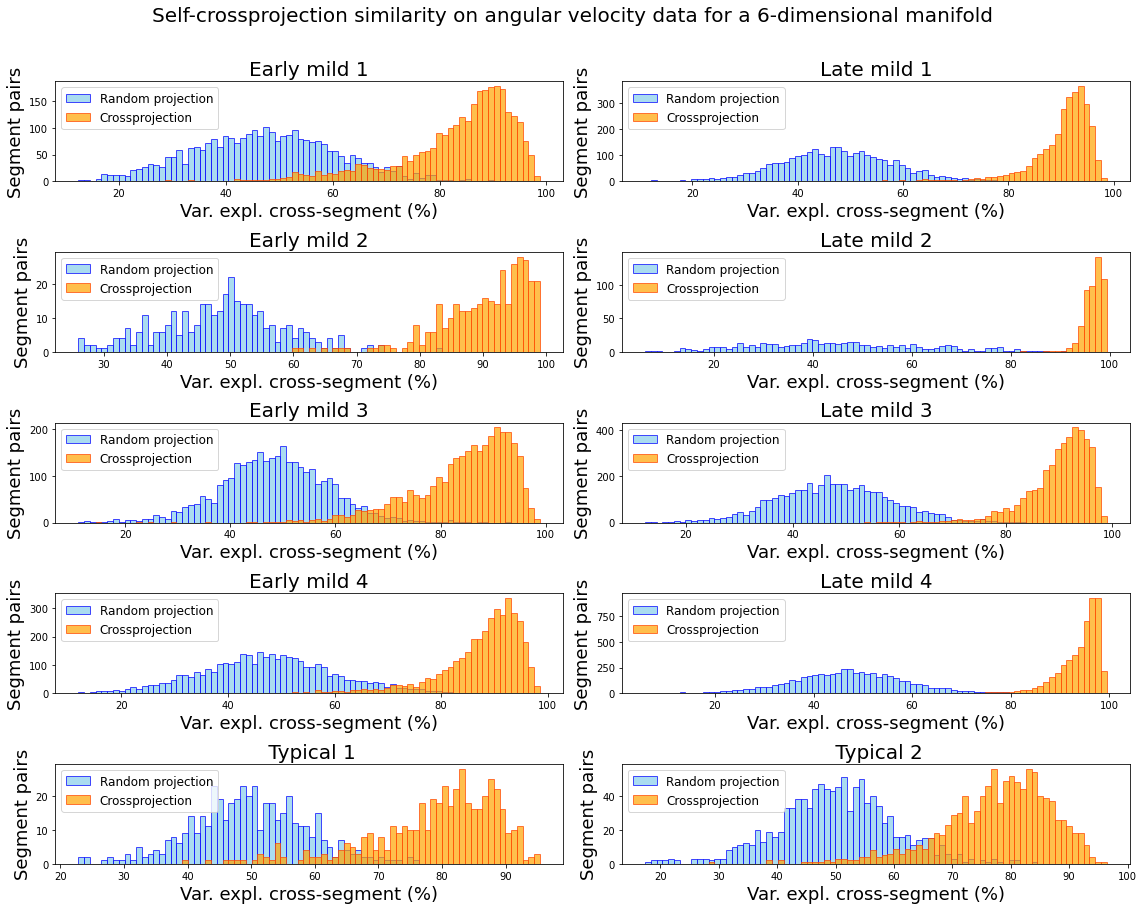

Wilcoxon rank sum test p-value: 0.0.
Wilcoxon rank sum test p-value: 0.0.
Wilcoxon rank sum test p-value: 0.0.
Wilcoxon rank sum test p-value: 0.0.
Wilcoxon rank sum test p-value: 0.0.
Wilcoxon rank sum test p-value: 0.0.
Wilcoxon rank sum test p-value: 0.0.
Wilcoxon rank sum test p-value: 0.0.
Wilcoxon rank sum test p-value: 0.0.
Wilcoxon rank sum test p-value: 0.0.


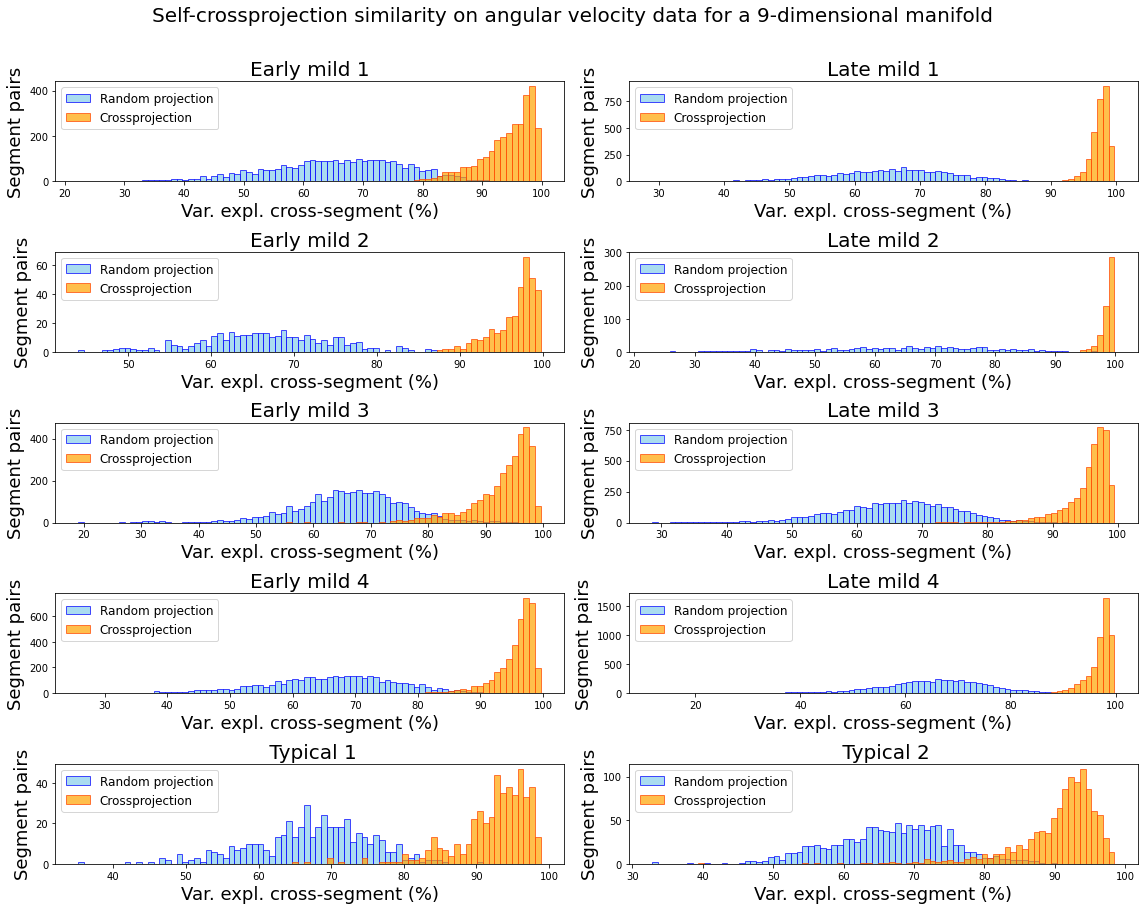

In [34]:
self_crossprojection_videos_plot(angular_velocity,labels,small_dim,'angular velocity')
self_crossprojection_videos_plot(angular_velocity,labels,interm_dim,'angular velocity')
self_crossprojection_videos_plot(angular_velocity,labels,big_dim,'angular velocity')

### Normalized angular velocity

Wilcoxon rank sum test p-value: 0.0.
Wilcoxon rank sum test p-value: 0.0.
Wilcoxon rank sum test p-value: 0.0.
Wilcoxon rank sum test p-value: 0.0.
Wilcoxon rank sum test p-value: 0.0.
Wilcoxon rank sum test p-value: 0.0.
Wilcoxon rank sum test p-value: 0.0.
Wilcoxon rank sum test p-value: 0.0.
Wilcoxon rank sum test p-value: 0.0.
Wilcoxon rank sum test p-value: 0.0.


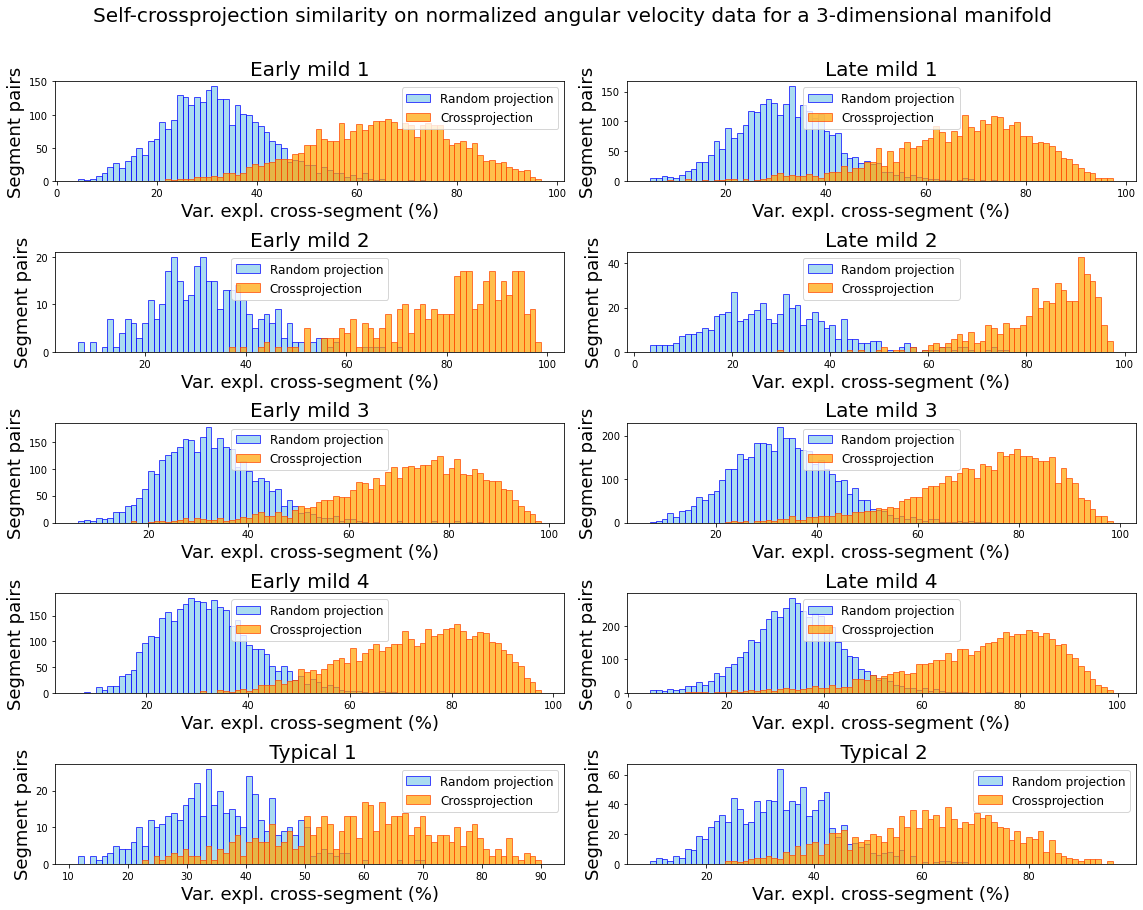

Wilcoxon rank sum test p-value: 0.0.
Wilcoxon rank sum test p-value: 0.0.
Wilcoxon rank sum test p-value: 0.0.
Wilcoxon rank sum test p-value: 0.0.
Wilcoxon rank sum test p-value: 0.0.
Wilcoxon rank sum test p-value: 0.0.
Wilcoxon rank sum test p-value: 0.0.
Wilcoxon rank sum test p-value: 0.0.
Wilcoxon rank sum test p-value: 0.0.
Wilcoxon rank sum test p-value: 0.0.


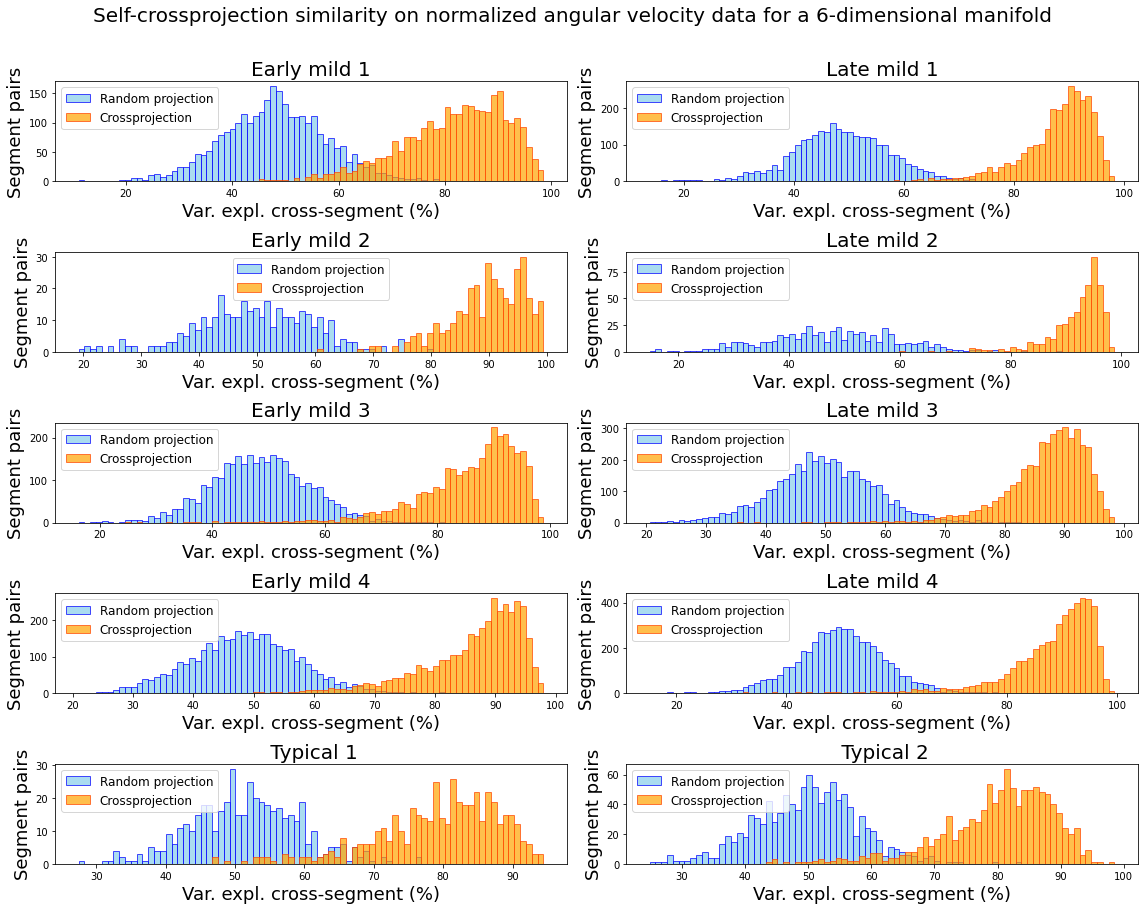

Wilcoxon rank sum test p-value: 0.0.
Wilcoxon rank sum test p-value: 0.0.
Wilcoxon rank sum test p-value: 0.0.
Wilcoxon rank sum test p-value: 0.0.
Wilcoxon rank sum test p-value: 0.0.
Wilcoxon rank sum test p-value: 0.0.
Wilcoxon rank sum test p-value: 0.0.
Wilcoxon rank sum test p-value: 0.0.
Wilcoxon rank sum test p-value: 0.0.
Wilcoxon rank sum test p-value: 0.0.


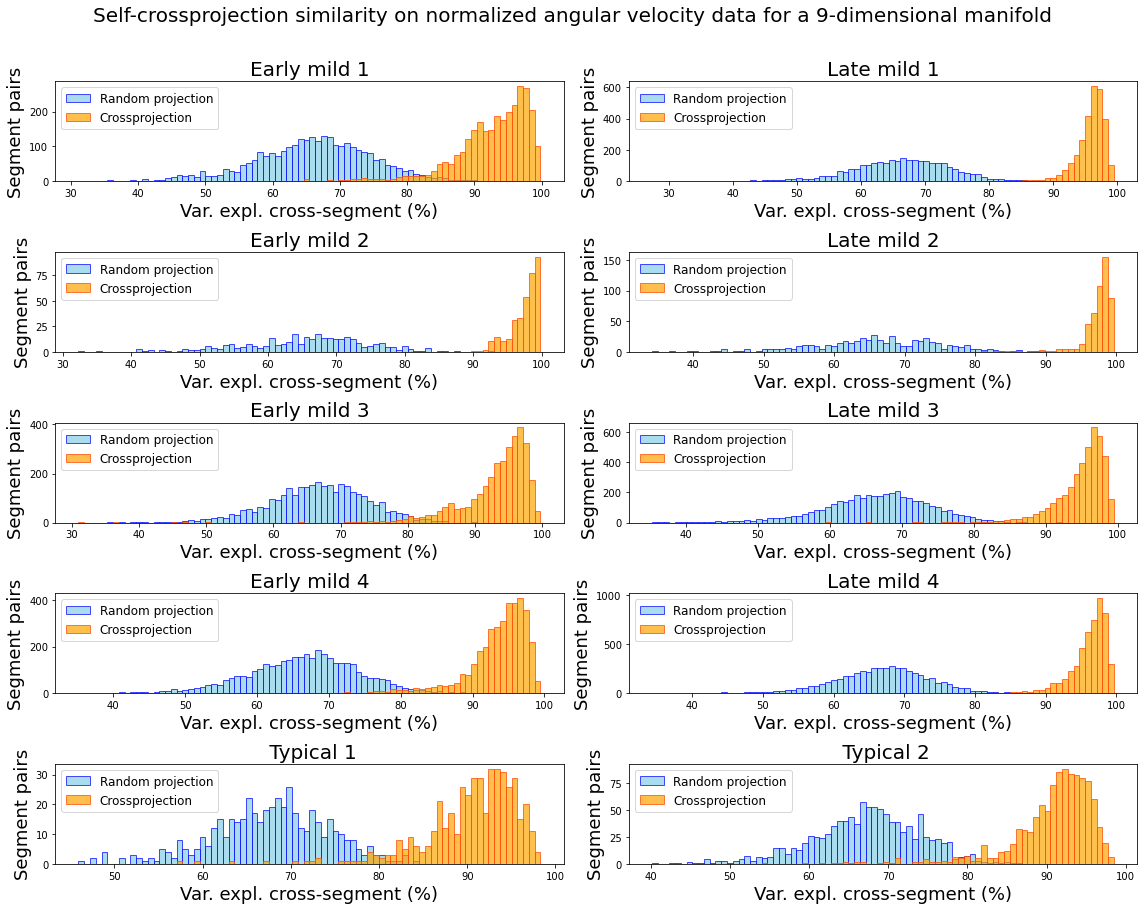

In [35]:
self_crossprojection_videos_plot(angular_velocity_norm,labels,small_dim,'normalized angular velocity')
self_crossprojection_videos_plot(angular_velocity_norm,labels,interm_dim,'normalized angular velocity')
self_crossprojection_videos_plot(angular_velocity_norm,labels,big_dim,'normalized angular velocity')

## Crossprojection between videos

In [6]:
# Angles
early_angles = [angles_EMT16_,angles_EMT17_,angles_EMT18_,angles_EMT19_]
late_angles = [angles_EMT46_2_,angles_EMT48_,angles_EMT47_,angles_EMT28_]

# Angles normalized
early_angles_norm = [angles_EMT16_normalized_,angles_EMT17_normalized_,angles_EMT18_normalized_,angles_EMT19_normalized_ ]
late_angles_norm = [angles_EMT46_2_normalized_,angles_EMT48_normalized_,angles_EMT47_normalized_,angles_EMT28_normalized_]

# Angular velocity
early_angular_velocity = [angular_velocity_EMT16_,angular_velocity_EMT17_,angular_velocity_EMT18_,angular_velocity_EMT19_]
late_angular_velocity = [angular_velocity_EMT46_2_,angular_velocity_EMT48_,angular_velocity_EMT47_,angular_velocity_EMT28_]

# Angular velocity normalized
early_angular_velocity_norm = [angular_velocity_EMT16_normalized_,angular_velocity_EMT17_normalized_,angular_velocity_EMT18_normalized_,angular_velocity_EMT19_normalized_ ]
late_angular_velocity_norm = [angular_velocity_EMT46_2_normalized_,angular_velocity_EMT48_normalized_,angular_velocity_EMT47_normalized_,angular_velocity_EMT28_normalized_]

### Angles

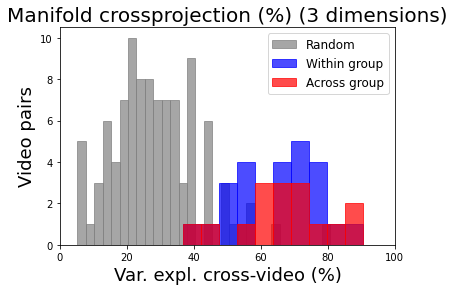

Wilcoxon rank sum test p-value: 0.761.


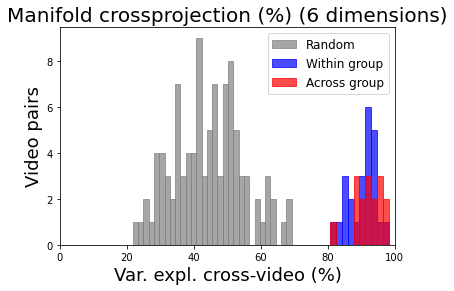

Wilcoxon rank sum test p-value: 0.258.


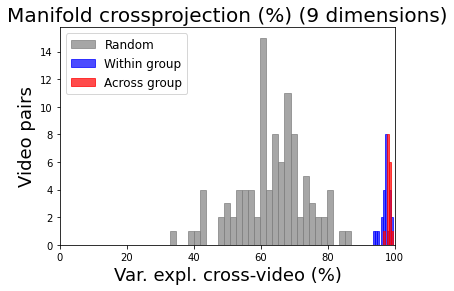

Wilcoxon rank sum test p-value: 0.005.


In [37]:
labels_ = ['Early mild 1','Late mild 1','Early mild 2','Late mild 2','Early mild 3','Late mild 3','Early mild 4','Late mild 4',' Typical 1',' Typical 2','random'] 

crossprojection_videos(angles,labels_,small_dim,'Angles')
crossprojection_videos_distributions(early_angles,late_angles,dim=small_dim)
crossprojection_videos(angles,labels_,interm_dim,'Angles')
crossprojection_videos_distributions(early_angles,late_angles,dim=interm_dim)
crossprojection_videos(angles,labels_,big_dim,'Angles')
crossprojection_videos_distributions(early_angles,late_angles,dim=big_dim)

### Normalized angles

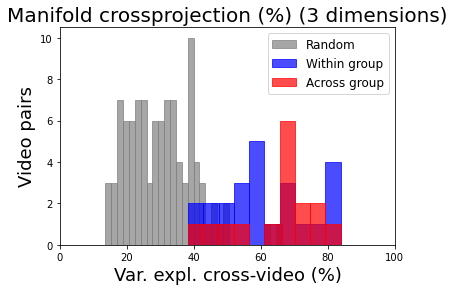

Wilcoxon rank sum test p-value: 0.473.


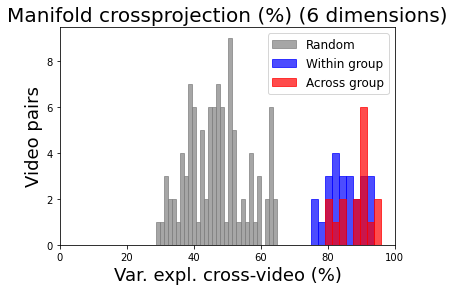

Wilcoxon rank sum test p-value: 0.077.


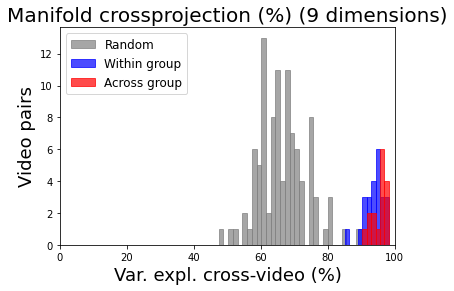

Wilcoxon rank sum test p-value: 0.082.


In [38]:
crossprojection_videos(angles_norm,labels_,small_dim,'Normalized angles')
crossprojection_videos_distributions(early_angles_norm,late_angles_norm,dim=small_dim)
crossprojection_videos(angles_norm,labels_,interm_dim,'Normalized angles')
crossprojection_videos_distributions(early_angles_norm,late_angles_norm,dim=interm_dim)
crossprojection_videos(angles_norm,labels_,big_dim,'Normalized angles')
crossprojection_videos_distributions(early_angles_norm,late_angles_norm,dim=big_dim)

### Angular velocity

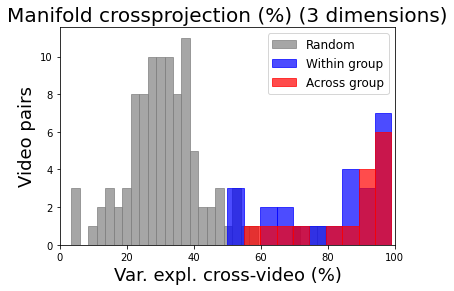

Wilcoxon rank sum test p-value: 0.294.


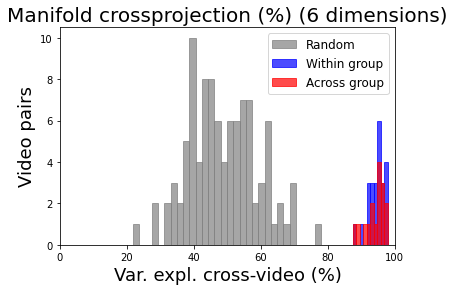

Wilcoxon rank sum test p-value: 0.72.


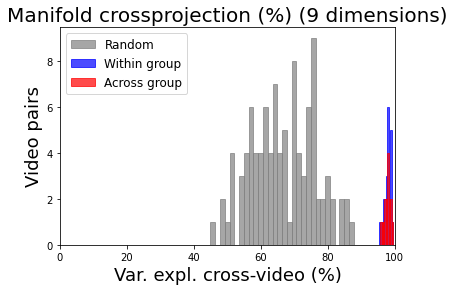

Wilcoxon rank sum test p-value: 0.956.


In [39]:
crossprojection_videos(angular_velocity,labels_,small_dim,'Angular velocity')
crossprojection_videos_distributions(early_angular_velocity,late_angular_velocity,dim=small_dim)
crossprojection_videos(angular_velocity,labels_,interm_dim,'Angular velocity')
crossprojection_videos_distributions(early_angular_velocity,late_angular_velocity,dim=interm_dim)
crossprojection_videos(angular_velocity,labels_,big_dim,'Angular velocity')
crossprojection_videos_distributions(early_angular_velocity,late_angular_velocity,dim=big_dim)

### Normalized angular velocity

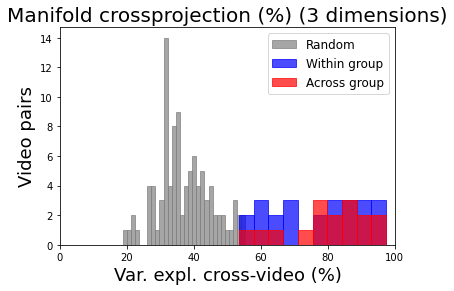

Wilcoxon rank sum test p-value: 0.6.


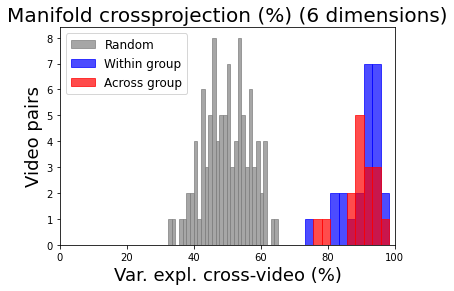

Wilcoxon rank sum test p-value: 0.334.


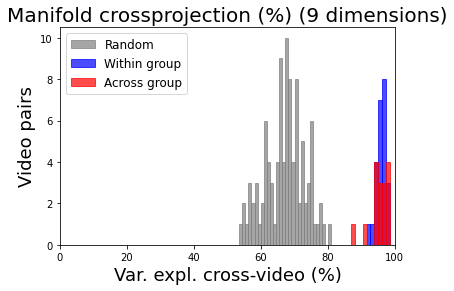

Wilcoxon rank sum test p-value: 0.912.


In [40]:
crossprojection_videos(angular_velocity_norm,labels_,small_dim,'Normalized angular velocity')
crossprojection_videos_distributions(early_angular_velocity_norm,late_angular_velocity_norm,dim=small_dim)
crossprojection_videos(angular_velocity_norm,labels_,interm_dim,'Normalized angular velocity')
crossprojection_videos_distributions(early_angular_velocity_norm,late_angular_velocity_norm,dim=interm_dim)
crossprojection_videos(angular_velocity_norm,labels_,big_dim,'Normalized angular velocity')
crossprojection_videos_distributions(early_angular_velocity_norm,late_angular_velocity_norm,dim=big_dim)

# Cum var babies in order

In [7]:
plt.rcParams.update({'font.family':'serif'})

In [8]:
# Angles normalized
early_angles_norm = [angles_EMT19_normalized_,angles_EMT16_normalized_,angles_EMT17_normalized_,angles_EMT18_normalized_ ]
late_angles_norm = [angles_EMT28_normalized_,angles_EMT46_2_normalized_,angles_EMT48_normalized_,angles_EMT47_normalized_]

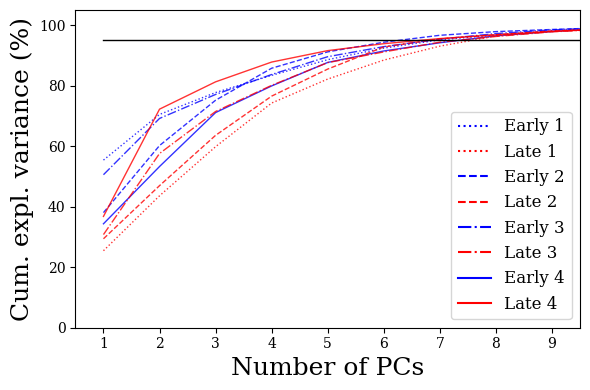

In [9]:
cum_expl_var_early_late(early_angles_norm+late_angles_norm)#,save_fig='cum_expl_var')

[77.71784836999889, 75.17928234890803, 77.09159563786322, 71.10309141928451]
[59.826376148578305, 63.57846365779035, 71.46541454749938, 81.26036188966242]


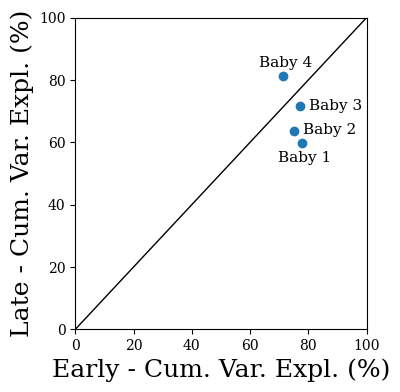

In [10]:
plot_early_vs_late_cum_var(early_angles_norm,late_angles_norm,3)#,save_fig='early_vs_late_expl_var')

# Manifolds comparison all babies

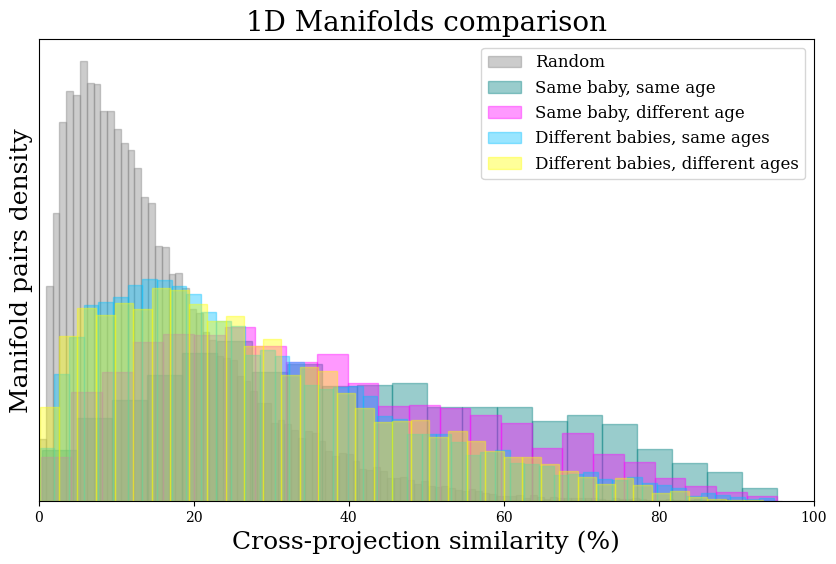

Rank sum test p-value (same age greater than different age): 0.326006.


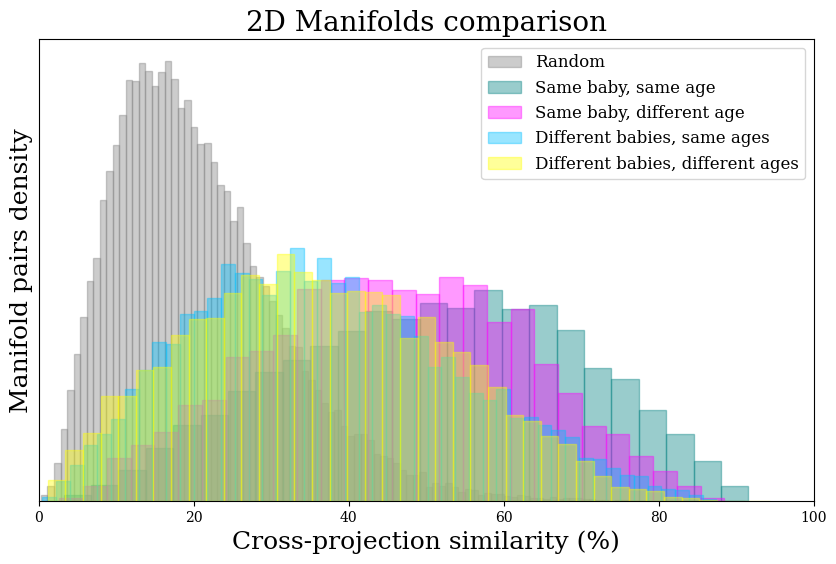

Rank sum test p-value (same age greater than different age): 0.125461.


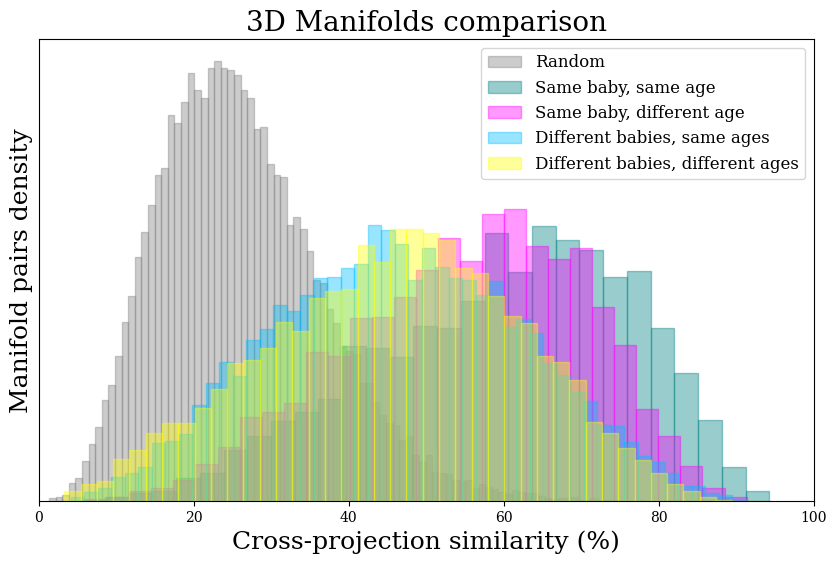

Rank sum test p-value (same age greater than different age): 0.188074.


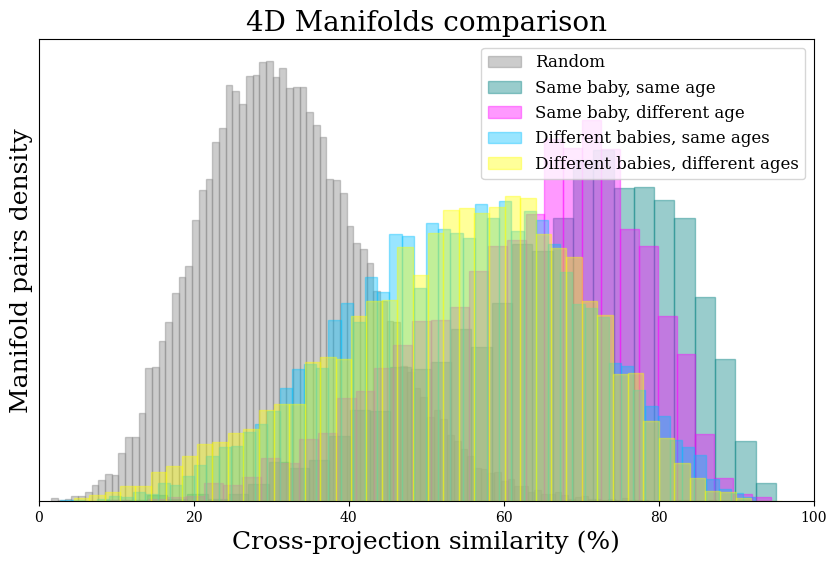

Rank sum test p-value (same age greater than different age): 0.056818.


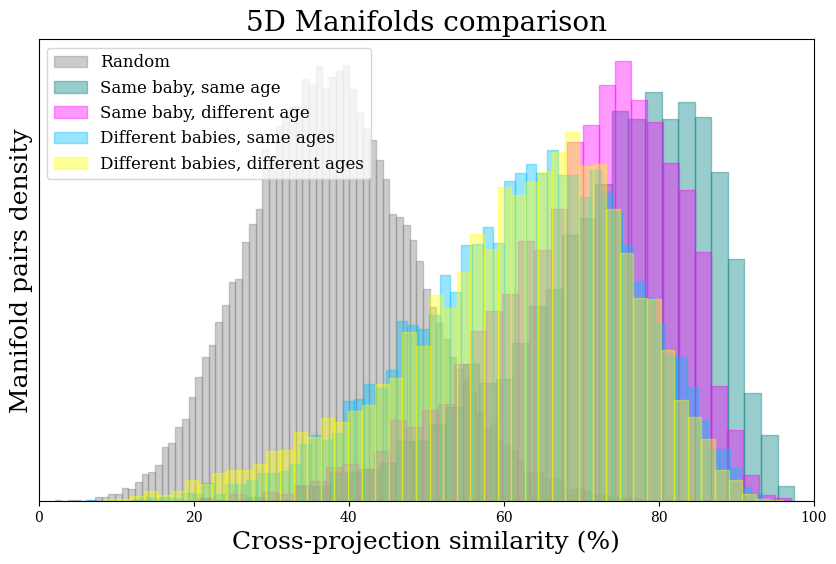

Rank sum test p-value (same age greater than different age): 7.2e-05.


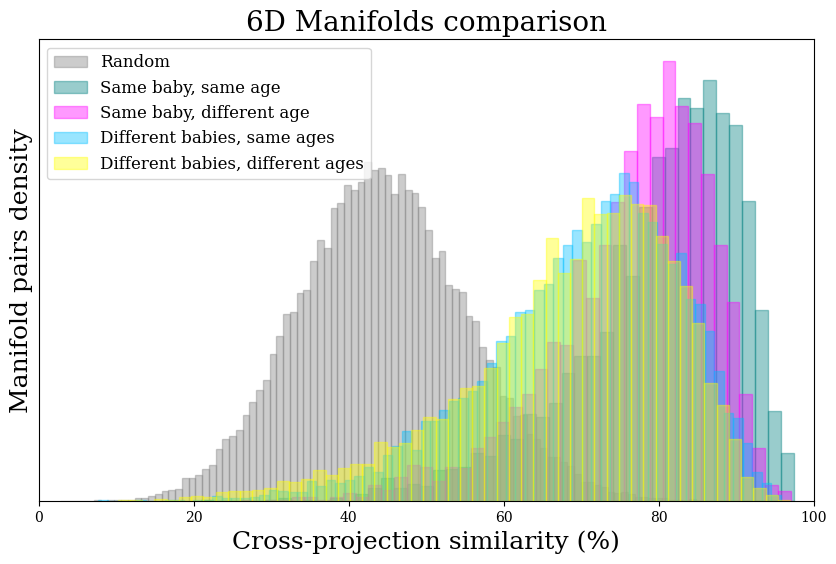

Rank sum test p-value (same age greater than different age): 0.0.


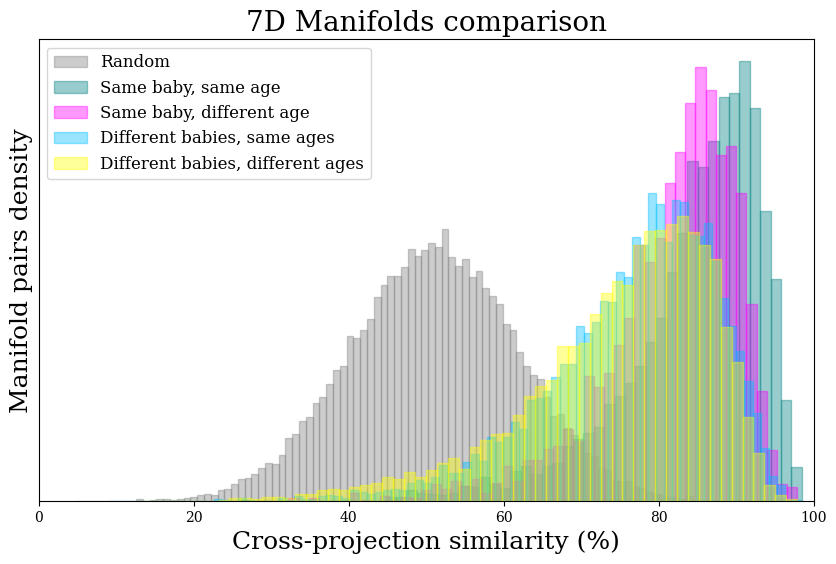

Rank sum test p-value (same age greater than different age): 0.0.


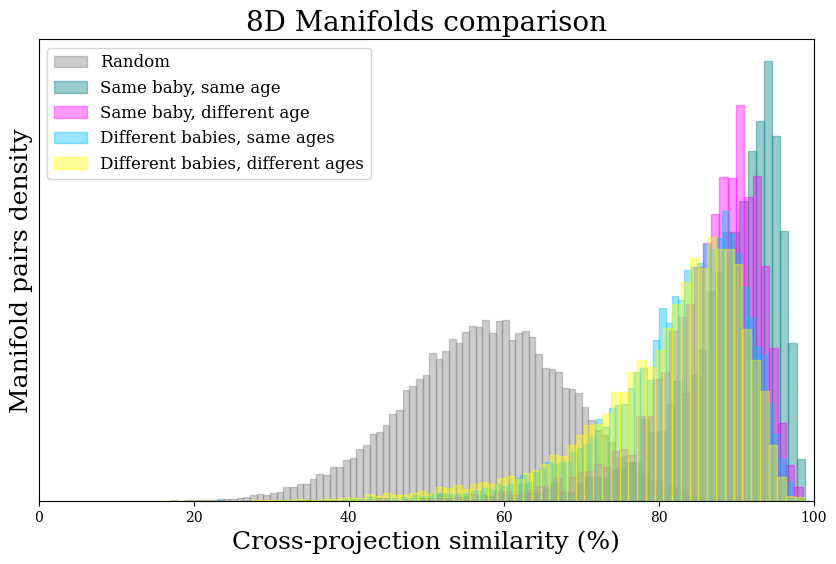

Rank sum test p-value (same age greater than different age): 0.0.


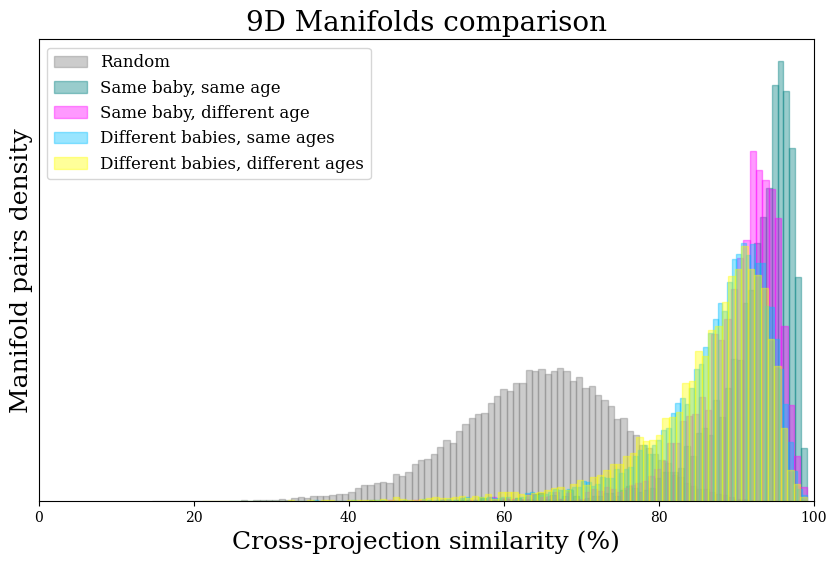

Rank sum test p-value (same age greater than different age): 0.0.


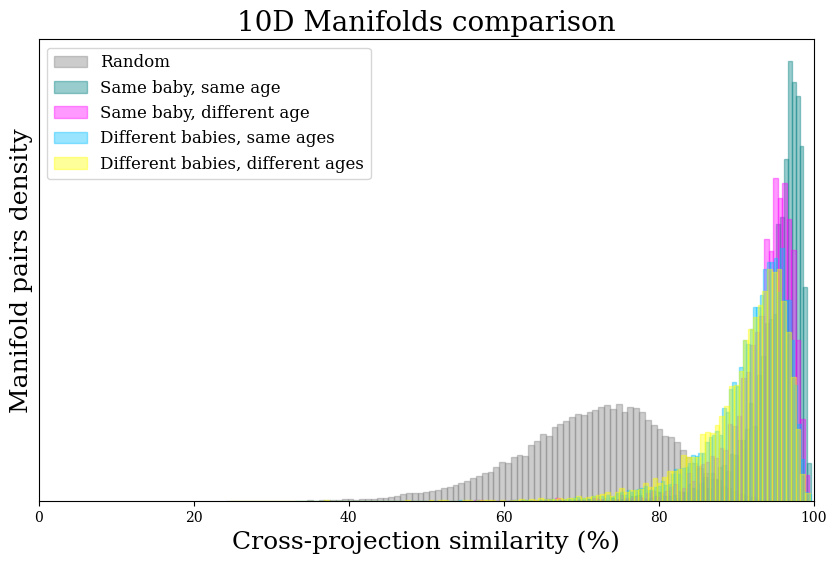

Rank sum test p-value (same age greater than different age): 0.0.


In [18]:
_,_,_,_,_=manifolds_comparison_chunks2(early_angles_norm,late_angles_norm,dim=1)
_,_,_,_,_=manifolds_comparison_chunks2(early_angles_norm,late_angles_norm,dim=2)
_,_,_,_,_=manifolds_comparison_chunks2(early_angles_norm,late_angles_norm,dim=small_dim)
_,_,_,_,_=manifolds_comparison_chunks2(early_angles_norm,late_angles_norm,dim=4)
_,_,_,_,_=manifolds_comparison_chunks2(early_angles_norm,late_angles_norm,dim=5)
_,_,_,_,_=manifolds_comparison_chunks2(early_angles_norm,late_angles_norm,dim=interm_dim)#,save_fig='Manifolds_comparison1')
_,_,_,_,_=manifolds_comparison_chunks2(early_angles_norm,late_angles_norm,dim=7)
_,_,_,_,_=manifolds_comparison_chunks2(early_angles_norm,late_angles_norm,dim=8)
_,_,_,_,_=manifolds_comparison_chunks2(early_angles_norm,late_angles_norm,dim=big_dim)
_,_,_,_,_=manifolds_comparison_chunks2(early_angles_norm,late_angles_norm,dim=10)

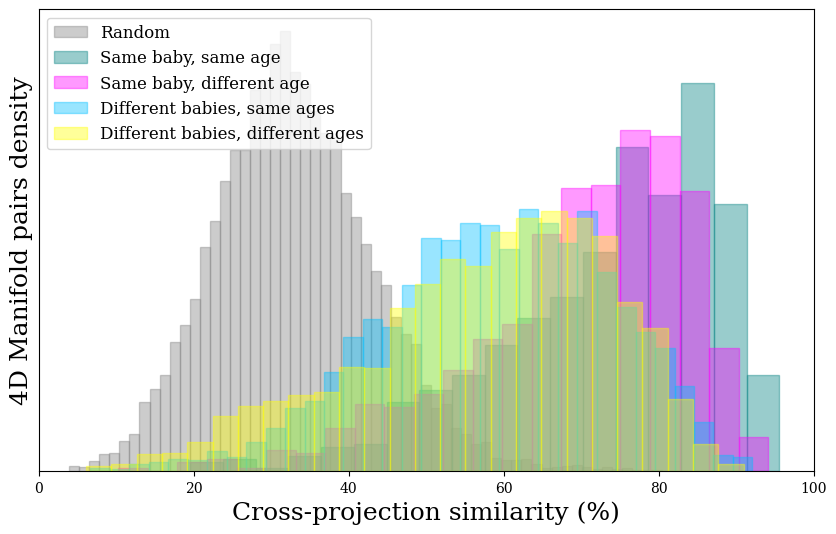

Rank sum test p-value (same age greater than different age): 0.097138.


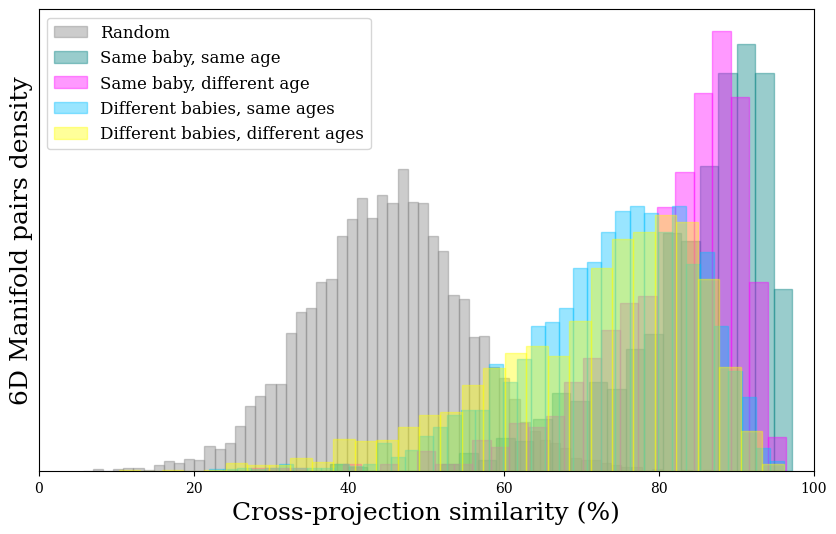

Rank sum test p-value (same age greater than different age): 1.9e-05.


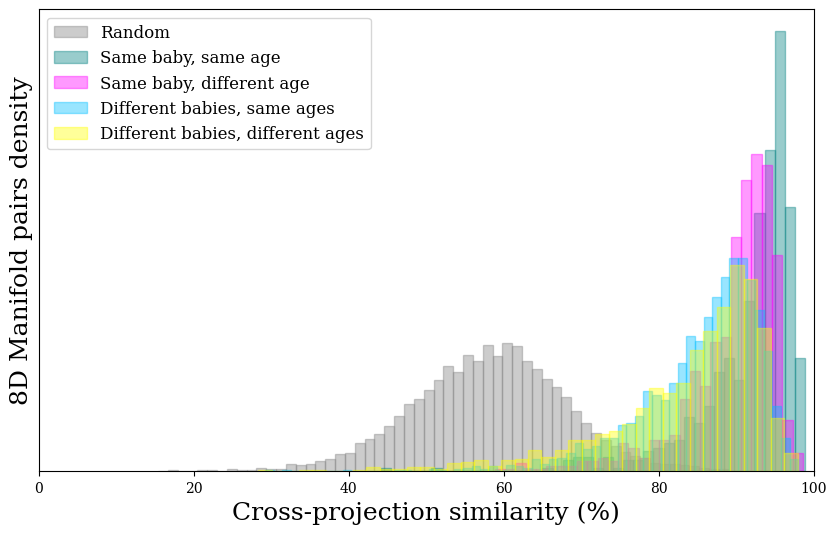

Rank sum test p-value (same age greater than different age): 2.7e-05.


In [60]:
_,_,_,_,_=manifolds_comparison_chunks2(early_angles_norm,late_angles_norm,dim=4,chunk_length=1000,save_fig='Manifolds_comparison_4D')
_,_,_,_,_=manifolds_comparison_chunks2(early_angles_norm,late_angles_norm,dim=6,chunk_length=1000,save_fig='Manifolds_comparison')
_,_,_,_,_=manifolds_comparison_chunks2(early_angles_norm,late_angles_norm,dim=8,chunk_length=1000,save_fig='Manifolds_comparison_8D')

# Excluding baby 4

In [19]:
# Angles normalized
early_angles_norm2 = [angles_EMT19_normalized_,angles_EMT16_normalized_,angles_EMT17_normalized_ ]
late_angles_norm2 = [angles_EMT28_normalized_,angles_EMT46_2_normalized_,angles_EMT48_normalized_]

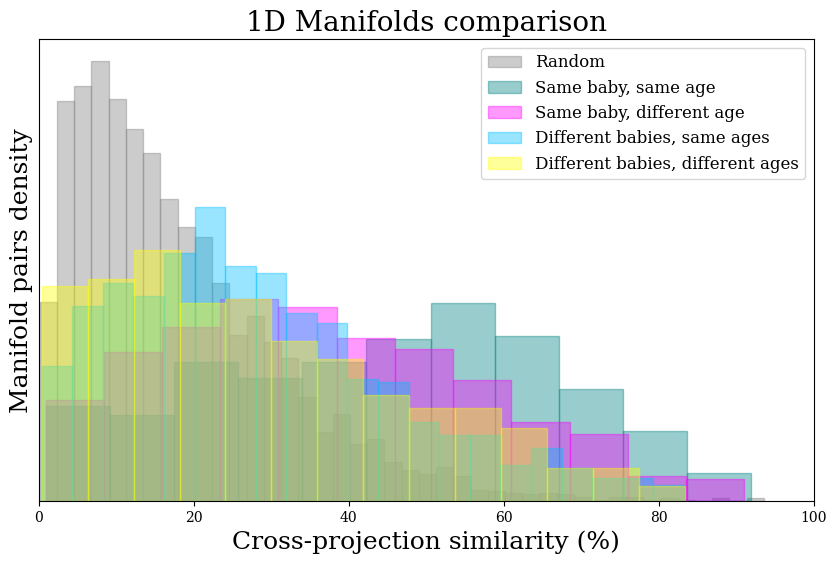

Rank sum test p-value (same age greater than different age): 0.294814.


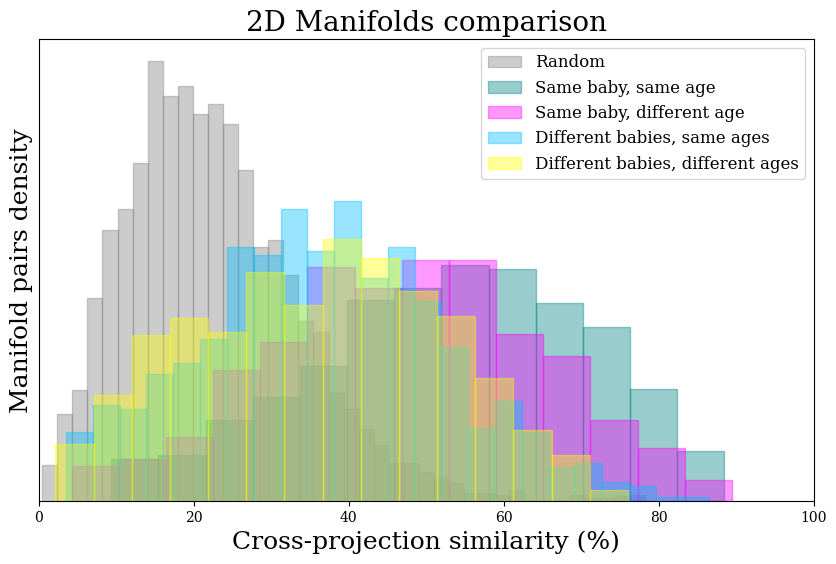

Rank sum test p-value (same age greater than different age): 0.412225.


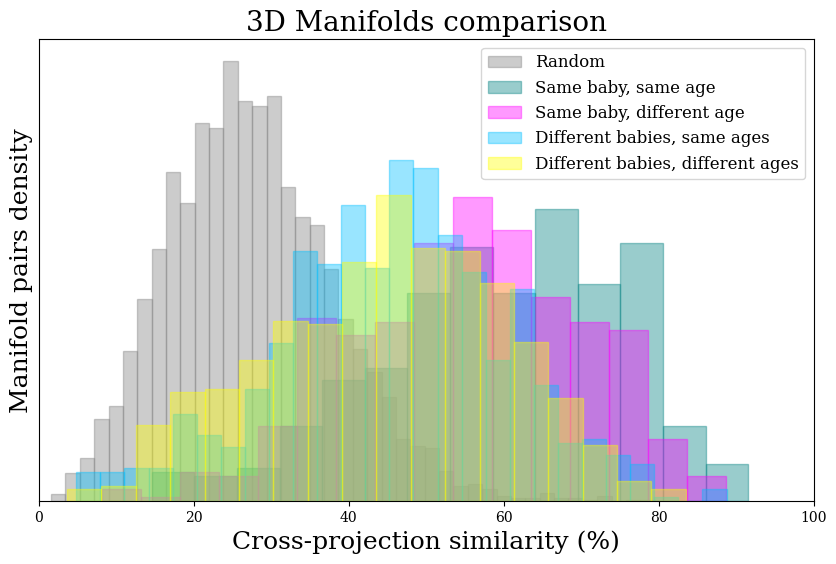

Rank sum test p-value (same age greater than different age): 0.182026.


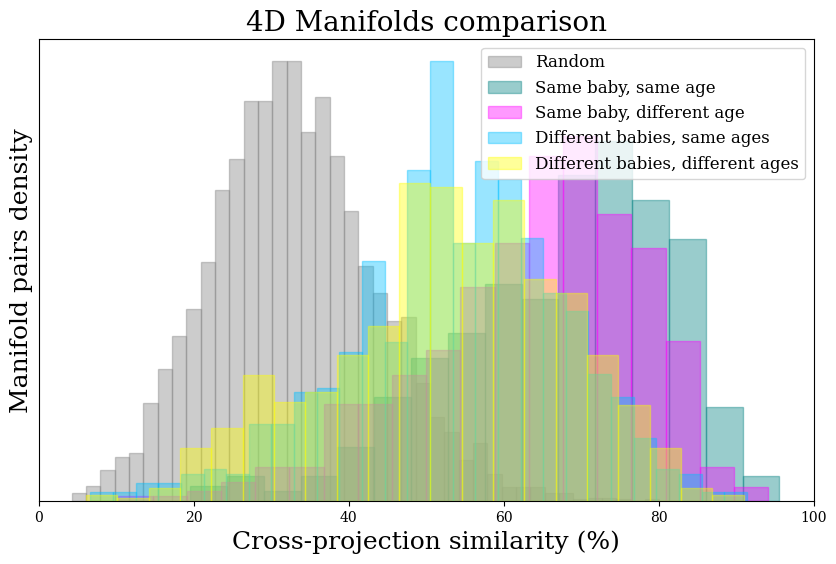

Rank sum test p-value (same age greater than different age): 0.160031.


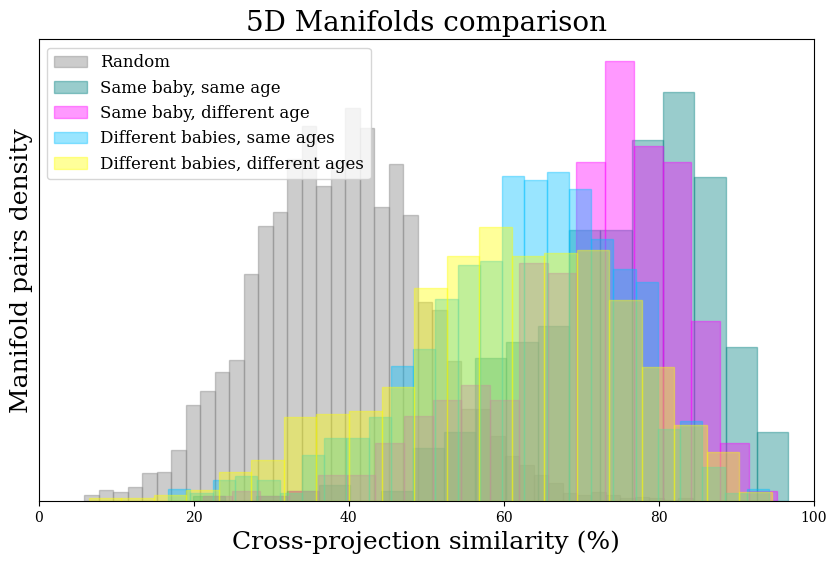

Rank sum test p-value (same age greater than different age): 0.000228.


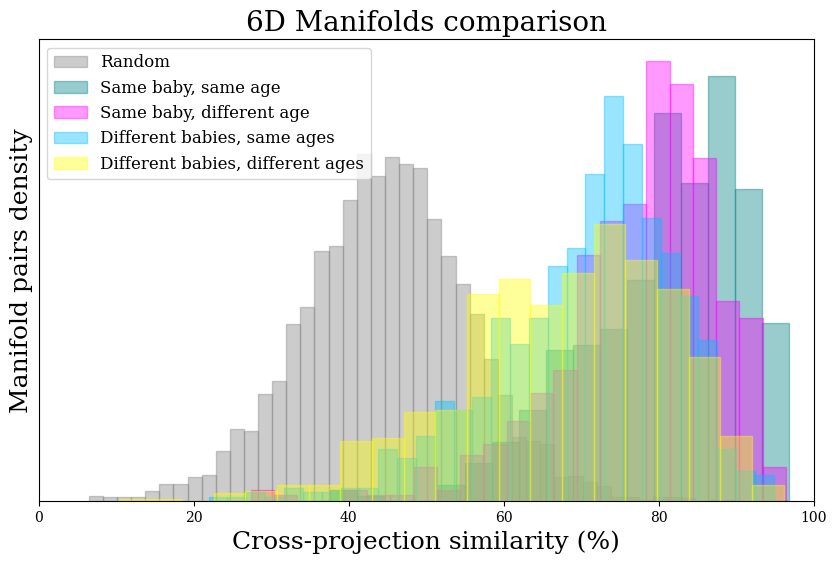

Rank sum test p-value (same age greater than different age): 0.0.


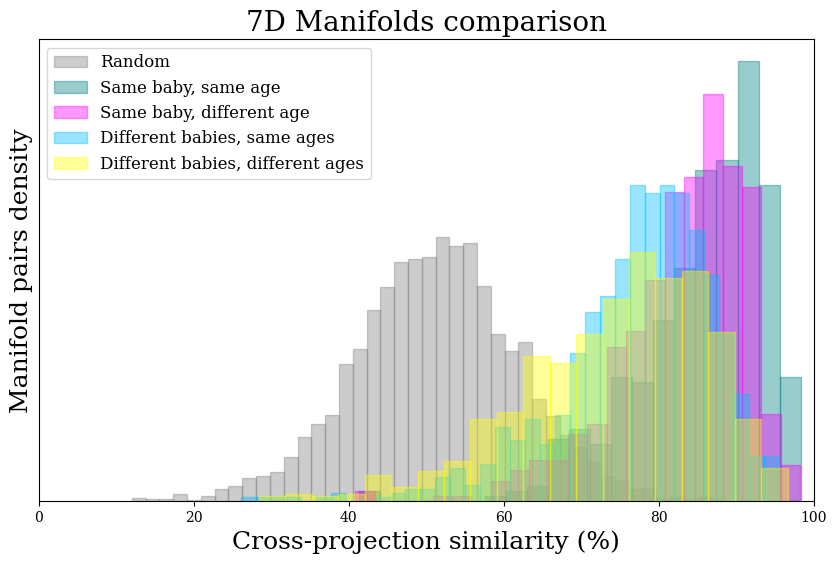

Rank sum test p-value (same age greater than different age): 0.0.


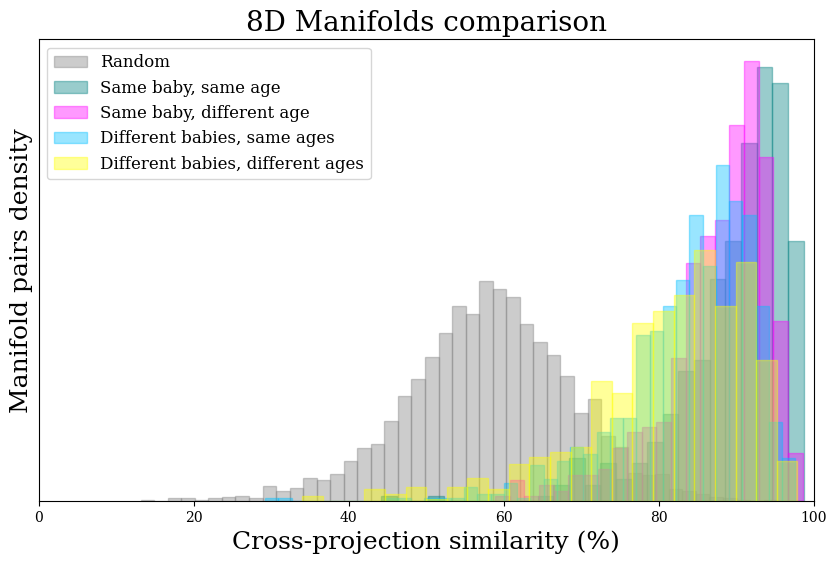

Rank sum test p-value (same age greater than different age): 0.0.


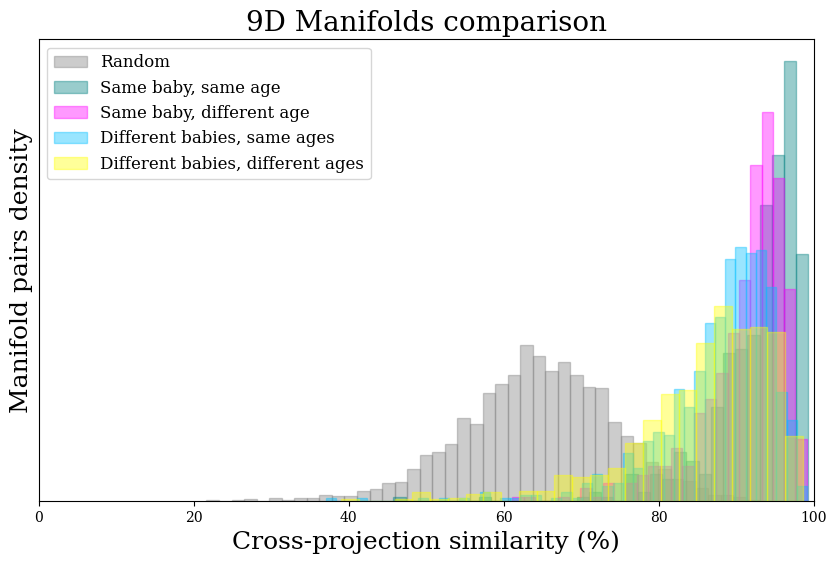

Rank sum test p-value (same age greater than different age): 1e-06.


In [20]:
_,_,_,_,_=manifolds_comparison_chunks2(early_angles_norm2,late_angles_norm2,dim=1,chunk_length=1000)
_,_,_,_,_=manifolds_comparison_chunks2(early_angles_norm2,late_angles_norm2,dim=2,chunk_length=1000)
_,_,_,_,_=manifolds_comparison_chunks2(early_angles_norm2,late_angles_norm2,dim=small_dim,chunk_length=1000)
_,_,_,_,_=manifolds_comparison_chunks2(early_angles_norm2,late_angles_norm2,dim=4,chunk_length=1000)
_,_,_,_,_=manifolds_comparison_chunks2(early_angles_norm2,late_angles_norm2,dim=5,chunk_length=1000)
_,_,_,_,_=manifolds_comparison_chunks2(early_angles_norm2,late_angles_norm2,dim=interm_dim,chunk_length=1000)#,save_fig='Manifolds_comparison1')
_,_,_,_,_=manifolds_comparison_chunks2(early_angles_norm2,late_angles_norm2,dim=7,chunk_length=1000)
_,_,_,_,_=manifolds_comparison_chunks2(early_angles_norm2,late_angles_norm2,dim=8,chunk_length=1000)
_,_,_,_,_=manifolds_comparison_chunks2(early_angles_norm2,late_angles_norm2,dim=9,chunk_length=1000)

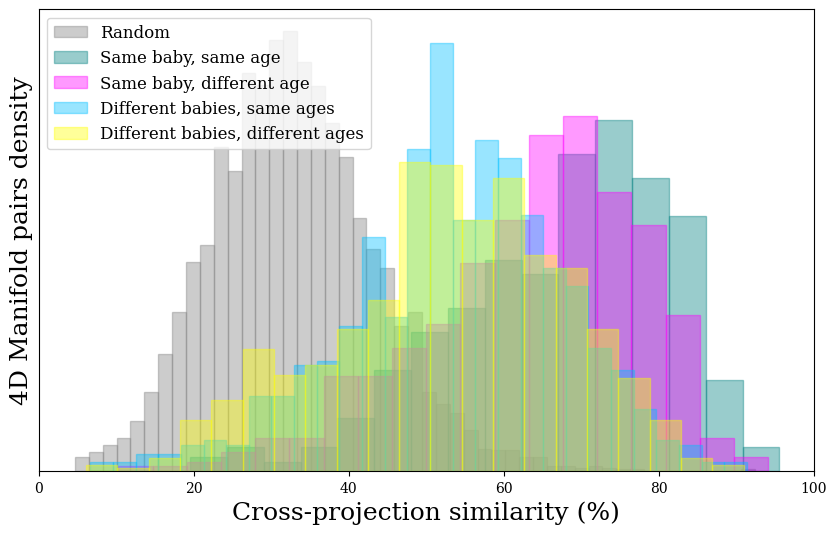

Rank sum test p-value (same age greater than different age): 0.160031.


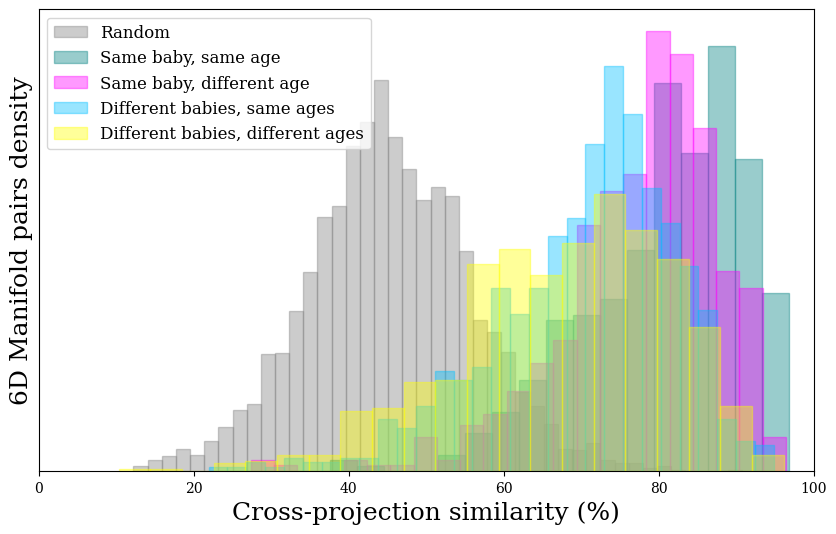

Rank sum test p-value (same age greater than different age): 0.0.


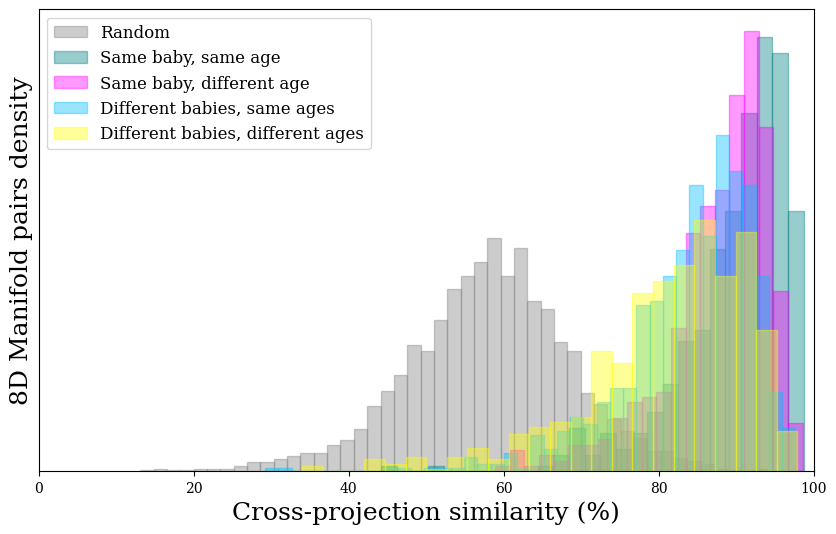

Rank sum test p-value (same age greater than different age): 0.0.


In [61]:
_,_,_,_,_=manifolds_comparison_chunks2(early_angles_norm2,late_angles_norm2,dim=4,chunk_length=1000,save_fig='Manifolds_comparison_4D_3babies')
_,_,_,_,_=manifolds_comparison_chunks2(early_angles_norm2,late_angles_norm2,dim=interm_dim,chunk_length=1000,save_fig='Manifolds_comparison_6D_3babies')
_,_,_,_,_=manifolds_comparison_chunks2(early_angles_norm2,late_angles_norm2,dim=8,chunk_length=1000,save_fig='Manifolds_comparison_8D_3babies')
